In [1]:
import pickle

In [136]:
SDF

{'ACC',
 'BLCA',
 'BRCA',
 'CESC',
 'CHOL',
 'COAD',
 'DLBC',
 'ESCA',
 'GBM',
 'HNSC',
 'KICH',
 'KIRC',
 'KIRP',
 'LAML',
 'LGG',
 'LIHC',
 'LUAD',
 'LUSC',
 'MESO',
 'OV',
 'PAAD',
 'PCPG',
 'PRAD',
 'READ',
 'SARC',
 'SKCM',
 'STAD',
 'TGCT',
 'THYM',
 'UCEC',
 'UCS',
 'UVM',
 'thca'}

In [119]:
data_pickle_loaded.iloc[100]

ENSG00000242268    0.108993
ENSG00000270112           0
ENSG00000167578      3.8083
ENSG00000273842           0
ENSG00000078237     1.70871
                     ...   
ENSG00000231119    0.149722
ENSG00000280861           0
ENSG00000123685    0.349415
ENSG00000181518           0
Cancer Type            BLCA
Name: 100, Length: 60484, dtype: object

In [3]:
mean_list=[]
std_list=[]
for i in range(len(data_pickle_loaded.columns)-1):
    mean_list.append([data_pickle_loaded[data_pickle_loaded.columns[i]].mean(),i])
    std_list.append([data_pickle_loaded[data_pickle_loaded.columns[i]].std(),i])

In [4]:
mean_list.sort()
std_list.sort()

In [5]:
mean_list[20000],std_list[20000]

([0.03016915621055866, 41723], [0.17394610572954766, 58796])

In [6]:
real_gene_list=[]
for i in range(len(data_pickle_loaded.columns)-1):
    if data_pickle_loaded[data_pickle_loaded.columns[i]].mean()<0.03016915621055866:
        continue
    if data_pickle_loaded[data_pickle_loaded.columns[i]].std()<0.17394610572954766:
        continue
    real_gene_list.append(data_pickle_loaded.columns[i])

In [7]:
len(real_gene_list)

37713

In [8]:
refined_data=data_pickle_loaded[real_gene_list]

In [9]:
refined_data

,ENSG00000242268,ENSG00000167578,ENSG00000078237,ENSG00000146083,ENSG00000158486,ENSG00000198242,ENSG00000259883,ENSG00000134108,ENSG00000263089,ENSG00000172137,...,ENSG00000135094,ENSG00000231612,ENSG00000238300,ENSG00000009694,ENSG00000186115,ENSG00000267117,ENSG00000273233,ENSG00000105063,ENSG00000231119,ENSG00000123685
0,0.000000,8.477550,3.752227,8.167628,0.002727,185.747792,0.105842,27.555108,0.009531,112.774793,...,0.447927,0.000000,0.000000,0.063279,0.025972,0.000000,0.095780,13.710199,0.202996,0.556461
1,0.000000,8.256191,5.710937,19.671295,0.004788,65.192395,0.139369,21.865264,0.025100,22.504410,...,0.756629,0.080129,0.221097,1.055424,0.000000,0.730975,0.294277,34.873762,0.138598,0.165028
2,0.000000,21.597853,10.063264,8.209208,0.007102,105.403943,0.045933,24.748711,0.000000,31.110055,...,2.650803,0.158455,0.000000,0.076893,0.000000,0.160611,0.166266,23.869834,0.078308,0.208859
3,0.000000,5.944981,11.808298,7.549678,0.041954,95.696616,0.101756,39.643748,0.006109,2.748724,...,0.574180,0.117008,0.000000,0.162229,0.183109,0.415100,0.000000,14.761982,0.086737,0.134949
4,0.047125,5.995748,5.589397,27.000628,0.010065,56.769953,0.043397,33.744279,0.015631,17.682334,...,0.973937,0.000000,0.000000,0.024648,0.005324,0.113806,0.000000,18.394012,0.101727,0.462480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,0.000000,3.522553,7.830633,8.741210,0.018317,237.813254,0.098723,18.879945,0.000000,0.017878,...,0.708996,0.068113,0.000000,0.028331,0.000000,0.069039,0.071470,16.723962,0.218796,0.903401
11090,0.000000,4.236288,4.593657,5.623583,0.028709,377.006081,0.000000,8.367077,0.011147,0.014011,...,0.174625,0.000000,0.000000,0.011101,0.000000,0.000000,0.000000,20.268288,0.105518,0.263843
11091,0.000000,2.562773,5.809708,10.336545,0.033974,276.080193,0.000000,18.208068,0.013191,0.033160,...,0.231699,0.042112,0.000000,0.007298,0.000000,0.085369,0.044188,14.666270,0.208114,0.076323
11092,0.000000,3.712029,8.122841,9.183449,0.000000,357.527690,0.000000,22.322743,0.009924,0.000000,...,0.084797,0.000000,0.000000,0.001647,0.000000,0.048167,0.000000,19.060373,0.070453,0.140932


In [ ]:
from skfeature.function.similarity_based import fisher_score

In [124]:
X_data_before=refined_data.to_numpy()
Y_data=data_pickle_loaded['Cancer Type'].to_numpy()

In [125]:
X_data_before.shape, Y_data.shape

((11094, 37713), (11094,))

In [ ]:
score = fisher_score.fisher_score(X_data_before, Y_data)

In [ ]:
idx = fisher_score.feature_ranking(score)

In [ ]:
idx.max()

In [ ]:
best_gene_index=idx[:8000]
best_gene_index.sort()

In [10]:

best_gene_index=[3,9,16,22,25,32,38,43,46,48,50,51,53,60,64,70,71,74,75,86,91,95,96,106,110,114,118,119,121,124,127,130,131,140,144,147,148,151,164,168,177,188,191,198,207,211,215,219,241,243,249,252,253,257,258,261,262,263,272,276,284,299,301,306,310,311,314,331,336,346,347,350,362,367,371,373,380,384,386,391,397,399,400,401,403,407,410,412,415,420,429,442,455,460,464,468,474,487,492,494,495,500,502,521,522,523,526,531,532,538,540,551,553,571,575,577,578,580,581,586,604,608,609,611,622,640,641,642,646,650,664,668,669,673,674,676,677,678,688,689,692,696,705,708,715,718,722,723,733,739,742,753,759,764,765,769,779,781,789,790,791,794,795,798,801,813,825,829,830,834,837,845,846,848,850,859,862,864,868,871,873,878,901,909,914,917,922,936,943,946,954,957,965,968,969,970,973,991,996,1002,1004,1008,1011,1012,1016,1031,1034,1035,1036,1044,1046,1048,1049,1058,1061,1063,1064,1071,1076,1080,1089,1096,1097,1101,1108,1114,1116,1120,1127,1132,1139,1140,1141,1142,1144,1145,1147,1148,1151,1161,1163,1170,1175,1176,1186,1188,1190,1191,1192,1199,1200,1215,1218,1219,1220,1224,1228,1231,1232,1238,1239,1240,1249,1254,1257,1258,1262,1264,1269,1271,1281,1287,1288,1292,1298,1302,1308,1311,1312,1315,1317,1321,1327,1330,1335,1338,1340,1350,1358,1365,1372,1386,1387,1395,1397,1398,1405,1415,1432,1433,1442,1444,1453,1460,1463,1466,1468,1476,1477,1480,1486,1492,1496,1499,1502,1506,1544,1548,1555,1563,1565,1571,1572,1576,1578,1582,1585,1589,1593,1594,1599,1606,1612,1613,1621,1623,1627,1630,1632,1634,1635,1636,1643,1647,1659,1660,1662,1667,1677,1678,1680,1682,1686,1697,1705,1708,1716,1719,1728,1730,1740,1741,1746,1751,1755,1760,1767,1768,1771,1778,1792,1813,1818,1820,1823,1827,1832,1836,1837,1848,1850,1853,1859,1860,1863,1865,1868,1869,1871,1873,1876,1877,1879,1885,1887,1892,1898,1905,1913,1916,1918,1919,1926,1929,1936,1947,1957,1965,1967,1969,1979,1994,1996,1997,2001,2003,2005,2007,2009,2012,2019,2023,2024,2025,2026,2027,2033,2037,2045,2051,2063,2064,2068,2071,2080,2085,2087,2091,2095,2112,2116,2125,2128,2139,2140,2142,2143,2146,2155,2164,2167,2170,2181,2184,2189,2199,2222,2223,2224,2228,2236,2238,2239,2248,2249,2250,2257,2261,2265,2271,2272,2273,2278,2282,2288,2290,2291,2292,2299,2306,2307,2317,2318,2323,2324,2327,2331,2334,2336,2338,2341,2347,2349,2365,2367,2375,2377,2381,2383,2385,2388,2395,2396,2401,2404,2407,2409,2410,2411,2419,2426,2429,2432,2435,2436,2437,2440,2441,2449,2455,2456,2465,2467,2470,2474,2478,2487,2491,2496,2504,2506,2513,2518,2521,2524,2525,2535,2546,2549,2550,2570,2571,2576,2577,2580,2584,2586,2596,2601,2614,2622,2629,2632,2634,2641,2647,2653,2655,2658,2660,2662,2666,2672,2676,2680,2686,2687,2688,2691,2705,2706,2719,2742,2745,2749,2752,2770,2771,2773,2776,2778,2781,2783,2786,2787,2795,2796,2800,2816,2821,2844,2846,2849,2853,2856,2858,2859,2864,2868,2873,2877,2879,2886,2894,2895,2900,2908,2914,2916,2917,2920,2929,2930,2932,2933,2935,2946,2950,2955,2956,2958,2969,2972,2977,2978,2980,2987,2989,2991,2994,3013,3014,3015,3017,3019,3022,3025,3028,3030,3034,3037,3039,3050,3053,3055,3061,3067,3074,3099,3107,3112,3114,3116,3117,3118,3120,3125,3129,3135,3139,3141,3143,3157,3174,3176,3179,3194,3200,3214,3218,3231,3241,3247,3248,3250,3251,3259,3269,3271,3272,3273,3278,3294,3295,3301,3306,3316,3353,3360,3361,3363,3364,3365,3370,3371,3373,3397,3402,3406,3414,3416,3425,3426,3427,3430,3436,3438,3442,3444,3445,3446,3448,3454,3456,3457,3460,3462,3471,3476,3479,3485,3494,3513,3517,3518,3524,3529,3532,3537,3542,3545,3550,3552,3555,3563,3564,3565,3568,3570,3574,3577,3586,3589,3590,3592,3596,3598,3602,3621,3627,3636,3642,3650,3654,3661,3662,3667,3691,3693,3703,3705,3706,3714,3723,3729,3731,3732,3741,3742,3746,3749,3751,3753,3755,3758,3762,3766,3767,3770,3773,3775,3780,3790,3791,3795,3796,3799,3803,3816,3818,3819,3827,3828,3829,3832,3843,3846,3849,3856,3863,3868,3872,3878,3880,3884,3893,3896,3900,3901,3907,3908,3909,3918,3920,3921,3923,3925,3930,3931,3932,3946,3951,3952,3956,3957,3963,3966,3977,3981,3985,3987,3989,3993,3996,4005,4007,4009,4013,4014,4016,4021,4022,4024,4031,4032,4043,4044,4045,4046,4047,4058,4069,4073,4076,4078,4080,4081,4087,4093,4094,4096,4100,4102,4103,4107,4109,4113,4116,4133,4135,4137,4138,4147,4149,4155,4158,4161,4167,4169,4170,4177,4195,4196,4198,4199,4202,4204,4207,4208,4209,4215,4218,4219,4221,4227,4237,4238,4242,4248,4249,4257,4258,4281,4282,4288,4291,4294,4314,4317,4318,4319,4325,4327,4328,4335,4338,4340,4341,4342,4347,4348,4351,4353,4354,4361,4363,4365,4368,4373,4375,4380,4381,4384,4385,4389,4390,4397,4414,4416,4434,4438,4442,4444,4448,4452,4453,4463,4468,4488,4495,4497,4507,4509,4518,4521,4527,4532,4553,4556,4560,4562,4563,4569,4570,4576,4577,4585,4586,4594,4596,4599,4600,4601,4611,4616,4618,4619,4623,4624,4647,4650,4651,4655,4662,4663,4669,4670,4688,4696,4697,4698,4699,4712,4713,4714,4715,4717,4728,4737,4753,4762,4763,4764,4769,4773,4778,4781,4797,4802,4806,4808,4827,4828,4831,4833,4837,4838,4840,4847,4855,4860,4868,4872,4873,4875,4881,4885,4888,4897,4900,4904,4911,4929,4932,4934,4940,4947,4948,4956,4959,4964,4965,4966,4967,4969,4975,4986,4994,4996,5009,5010,5012,5024,5029,5037,5039,5040,5047,5060,5069,5073,5074,5077,5078,5087,5091,5097,5098,5099,5100,5103,5108,5116,5118,5122,5128,5132,5140,5141,5143,5152,5153,5156,5164,5165,5167,5168,5171,5173,5176,5179,5185,5191,5197,5199,5207,5214,5225,5226,5231,5241,5242,5252,5253,5254,5255,5256,5257,5261,5264,5269,5273,5290,5295,5298,5299,5301,5309,5310,5317,5321,5334,5335,5336,5337,5349,5357,5363,5366,5367,5377,5379,5383,5388,5389,5399,5400,5404,5408,5420,5421,5422,5424,5428,5434,5443,5456,5463,5466,5469,5473,5476,5478,5483,5487,5489,5490,5498,5499,5501,5504,5519,5525,5526,5531,5533,5539,5552,5561,5563,5564,5568,5569,5570,5572,5573,5578,5579,5582,5585,5595,5596,5606,5607,5608,5609,5617,5619,5621,5622,5629,5637,5638,5642,5643,5658,5673,5675,5676,5678,5681,5696,5703,5711,5714,5716,5720,5721,5729,5734,5737,5739,5742,5746,5748,5751,5753,5754,5758,5760,5763,5765,5774,5778,5787,5796,5802,5806,5813,5814,5815,5822,5836,5846,5848,5849,5852,5853,5854,5855,5856,5866,5878,5880,5885,5887,5888,5901,5917,5929,5930,5933,5934,5935,5937,5940,5949,5957,5958,5960,5961,5970,5985,5988,5992,5993,5996,5997,6004,6014,6015,6023,6025,6027,6036,6046,6048,6052,6056,6057,6060,6064,6071,6082,6100,6101,6102,6111,6114,6124,6129,6130,6141,6145,6150,6156,6170,6171,6177,6185,6191,6192,6197,6198,6204,6207,6209,6210,6212,6220,6222,6225,6236,6252,6255,6260,6264,6271,6272,6274,6275,6278,6279,6280,6287,6294,6296,6302,6307,6312,6316,6319,6324,6326,6327,6338,6350,6356,6360,6361,6362,6364,6368,6370,6376,6377,6384,6398,6399,6401,6402,6409,6413,6414,6415,6416,6419,6420,6425,6432,6436,6442,6450,6451,6465,6469,6470,6471,6486,6501,6509,6512,6517,6521,6522,6527,6532,6536,6542,6547,6549,6552,6558,6561,6562,6563,6575,6578,6582,6602,6607,6609,6613,6614,6618,6621,6622,6625,6626,6637,6639,6649,6653,6656,6659,6662,6665,6666,6676,6686,6690,6695,6698,6713,6719,6724,6726,6728,6732,6737,6743,6746,6747,6748,6752,6753,6754,6764,6770,6771,6773,6778,6780,6782,6792,6796,6808,6812,6817,6823,6826,6827,6830,6832,6833,6838,6843,6846,6847,6848,6855,6858,6859,6861,6865,6875,6883,6889,6891,6895,6901,6904,6908,6911,6919,6923,6924,6933,6934,6951,6952,6967,6970,6983,6984,6992,6994,6996,7001,7002,7003,7007,7013,7021,7037,7041,7050,7058,7059,7064,7069,7072,7075,7076,7078,7079,7090,7092,7095,7097,7100,7105,7109,7110,7115,7119,7121,7126,7134,7136,7140,7153,7159,7161,7162,7163,7165,7169,7185,7186,7188,7198,7200,7209,7228,7235,7245,7252,7259,7264,7271,7272,7273,7278,7286,7290,7294,7300,7330,7342,7354,7357,7358,7370,7371,7378,7393,7404,7411,7412,7419,7423,7425,7427,7430,7432,7437,7443,7447,7449,7451,7456,7472,7473,7475,7476,7482,7488,7492,7494,7496,7499,7500,7506,7507,7515,7516,7521,7522,7525,7526,7529,7530,7531,7533,7536,7538,7549,7553,7556,7560,7567,7569,7572,7573,7574,7577,7579,7580,7581,7587,7595,7596,7601,7604,7613,7616,7618,7619,7621,7631,7632,7633,7637,7643,7644,7649,7651,7654,7657,7659,7660,7665,7669,7670,7672,7675,7679,7682,7683,7684,7687,7689,7696,7697,7699,7700,7703,7706,7719,7722,7727,7728,7734,7739,7743,7744,7746,7748,7749,7750,7754,7755,7757,7766,7769,7775,7780,7789,7790,7796,7797,7799,7803,7812,7815,7821,7823,7824,7827,7829,7833,7835,7837,7838,7840,7842,7846,7847,7853,7857,7859,7867,7869,7870,7876,7877,7903,7907,7916,7917,7920,7921,7925,7926,7931,7933,7937,7939,7949,7962,7979,7984,7989,7993,8001,8004,8008,8009,8012,8019,8027,8031,8032,8040,8041,8045,8049,8050,8053,8057,8063,8065,8069,8071,8076,8085,8086,8089,8100,8113,8117,8118,8119,8120,8124,8125,8129,8138,8149,8158,8159,8165,8170,8179,8182,8187,8196,8198,8208,8209,8217,8224,8234,8236,8240,8246,8250,8252,8255,8258,8263,8264,8265,8269,8270,8277,8283,8288,8294,8299,8303,8306,8307,8311,8317,8321,8323,8324,8327,8330,8331,8339,8342,8353,8357,8360,8362,8364,8367,8368,8371,8376,8377,8381,8386,8388,8391,8400,8406,8407,8411,8431,8443,8455,8461,8463,8465,8467,8478,8481,8482,8495,8496,8512,8513,8514,8516,8517,8521,8525,8526,8533,8537,8540,8545,8549,8555,8558,8561,8564,8567,8570,8573,8575,8576,8590,8593,8600,8621,8625,8630,8631,8636,8639,8644,8645,8653,8655,8656,8659,8660,8661,8662,8663,8668,8678,8679,8686,8695,8698,8705,8707,8713,8725,8727,8731,8733,8742,8743,8745,8752,8755,8758,8763,8765,8772,8773,8787,8792,8793,8803,8806,8807,8810,8813,8814,8831,8835,8836,8838,8843,8845,8851,8853,8857,8863,8865,8871,8876,8887,8894,8906,8908,8918,8923,8925,8929,8936,8940,8952,8957,8964,8969,8972,8975,8976,8980,8987,8989,8990,9001,9013,9014,9026,9038,9045,9046,9050,9055,9057,9058,9070,9073,9082,9089,9093,9098,9100,9115,9116,9118,9122,9131,9137,9138,9141,9143,9155,9160,9161,9164,9167,9170,9177,9187,9191,9192,9197,9198,9202,9205,9216,9232,9241,9243,9253,9257,9268,9272,9273,9278,9279,9280,9289,9290,9297,9301,9308,9311,9313,9318,9327,9330,9338,9342,9344,9345,9351,9359,9363,9364,9368,9374,9375,9376,9380,9384,9389,9390,9391,9395,9402,9407,9408,9412,9416,9419,9428,9431,9438,9439,9442,9448,9455,9460,9464,9467,9469,9473,9478,9487,9491,9492,9498,9513,9516,9518,9521,9522,9523,9525,9531,9539,9547,9548,9552,9553,9554,9555,9568,9569,9571,9578,9582,9585,9588,9590,9592,9595,9596,9599,9605,9606,9607,9616,9621,9623,9627,9629,9631,9635,9641,9647,9648,9649,9651,9654,9662,9667,9670,9684,9691,9692,9698,9702,9703,9704,9709,9711,9719,9721,9731,9732,9734,9741,9742,9745,9746,9750,9754,9760,9769,9771,9788,9789,9790,9796,9799,9801,9804,9805,9808,9809,9810,9815,9819,9820,9826,9827,9843,9845,9849,9856,9861,9867,9870,9872,9874,9880,9886,9889,9890,9891,9895,9896,9899,9901,9906,9908,9909,9913,9916,9917,9921,9923,9927,9931,9932,9933,9934,9938,9942,9944,9945,9946,9954,9955,9964,9966,9968,9971,9973,9987,9995,10001,10006,10018,10022,10025,10035,10039,10041,10047,10051,10052,10053,10059,10066,10072,10076,10086,10097,10100,10101,10102,10103,10104,10105,10107,10109,10114,10138,10148,10151,10153,10156,10157,10166,10170,10171,10172,10176,10178,10181,10184,10203,10208,10209,10215,10218,10221,10223,10226,10228,10235,10242,10244,10251,10252,10253,10260,10263,10265,10266,10267,10269,10270,10273,10275,10281,10283,10284,10287,10291,10298,10301,10305,10314,10316,10318,10319,10320,10326,10328,10337,10341,10350,10351,10354,10360,10364,10371,10374,10379,10385,10388,10392,10397,10409,10420,10422,10431,10439,10448,10456,10457,10461,10462,10463,10467,10468,10470,10472,10473,10474,10481,10483,10487,10495,10499,10504,10506,10512,10515,10522,10529,10530,10534,10536,10538,10544,10546,10548,10552,10553,10564,10566,10571,10574,10580,10582,10584,10587,10588,10597,10602,10605,10614,10618,10625,10631,10636,10641,10642,10644,10645,10663,10680,10685,10689,10705,10707,10712,10715,10716,10720,10723,10730,10731,10735,10738,10746,10747,10749,10750,10751,10752,10763,10768,10771,10776,10784,10791,10793,10794,10798,10799,10802,10806,10811,10812,10816,10823,10830,10836,10844,10854,10856,10871,10873,10878,10879,10886,10888,10891,10892,10903,10915,10927,10928,10940,10944,10945,10947,10951,10953,10954,10955,10963,10968,10981,10984,10999,11007,11011,11022,11027,11029,11035,11037,11051,11052,11053,11056,11061,11062,11068,11077,11087,11096,11104,11116,11122,11131,11140,11149,11156,11158,11164,11166,11167,11168,11175,11176,11186,11188,11195,11196,11198,11199,11214,11215,11217,11219,11226,11232,11235,11242,11246,11249,11250,11252,11259,11264,11269,11275,11278,11285,11299,11300,11301,11310,11314,11317,11320,11321,11327,11330,11334,11336,11341,11343,11344,11346,11355,11357,11362,11368,11370,11372,11376,11377,11380,11381,11382,11383,11385,11395,11403,11404,11408,11422,11429,11436,11437,11441,11442,11443,11445,11446,11449,11455,11458,11460,11471,11482,11486,11497,11504,11515,11519,11535,11537,11538,11542,11547,11553,11554,11569,11574,11577,11579,11585,11590,11592,11594,11596,11600,11603,11610,11617,11619,11620,11621,11622,11623,11624,11632,11634,11638,11641,11648,11664,11677,11681,11684,11687,11688,11691,11693,11695,11696,11699,11700,11713,11715,11718,11720,11723,11724,11731,11735,11737,11740,11745,11754,11756,11763,11766,11767,11773,11779,11781,11783,11786,11788,11790,11791,11796,11803,11804,11809,11812,11822,11829,11832,11838,11856,11858,11860,11877,11880,11882,11885,11886,11899,11909,11917,11924,11927,11930,11932,11935,11938,11947,11955,11956,11962,11967,11976,11986,11987,11989,11998,12002,12007,12016,12020,12021,12027,12029,12030,12035,12037,12038,12042,12043,12044,12049,12058,12067,12071,12075,12076,12083,12102,12103,12104,12117,12121,12123,12128,12130,12131,12139,12150,12152,12153,12158,12159,12161,12168,12170,12174,12177,12181,12184,12197,12198,12201,12203,12211,12213,12229,12251,12265,12269,12272,12274,12284,12286,12292,12294,12296,12297,12300,12301,12306,12307,12313,12322,12326,12328,12329,12332,12333,12339,12341,12343,12345,12352,12359,12364,12365,12376,12382,12396,12402,12405,12407,12409,12424,12430,12436,12444,12446,12450,12453,12455,12460,12462,12465,12469,12477,12478,12482,12486,12487,12490,12494,12496,12498,12499,12503,12504,12508,12509,12511,12515,12521,12523,12526,12535,12539,12556,12558,12584,12590,12594,12600,12601,12608,12610,12624,12630,12631,12632,12639,12643,12644,12654,12657,12659,12665,12668,12676,12678,12679,12681,12685,12688,12695,12696,12699,12722,12734,12735,12742,12744,12748,12749,12753,12763,12764,12767,12769,12778,12782,12786,12790,12791,12793,12800,12801,12811,12813,12818,12823,12824,12827,12831,12833,12834,12839,12844,12850,12855,12859,12861,12877,12878,12880,12881,12883,12884,12888,12891,12904,12905,12912,12916,12923,12927,12932,12935,12948,12949,12965,12971,12973,12979,12982,13018,13024,13026,13033,13038,13051,13052,13054,13072,13078,13098,13110,13118,13120,13125,13126,13134,13135,13138,13139,13141,13147,13148,13150,13152,13154,13158,13164,13165,13171,13182,13187,13190,13196,13201,13208,13214,13215,13216,13230,13231,13234,13237,13240,13241,13242,13245,13246,13258,13272,13274,13282,13284,13285,13290,13292,13293,13295,13301,13306,13331,13340,13341,13350,13353,13361,13372,13376,13378,13384,13385,13390,13396,13402,13405,13407,13409,13423,13425,13426,13429,13441,13453,13475,13502,13506,13507,13519,13522,13523,13526,13531,13533,13534,13544,13564,13567,13571,13576,13579,13581,13586,13587,13593,13602,13603,13608,13613,13621,13622,13623,13637,13640,13641,13649,13650,13653,13660,13663,13673,13676,13677,13679,13681,13686,13690,13692,13697,13698,13699,13702,13707,13709,13723,13725,13727,13729,13731,13732,13737,13741,13743,13751,13755,13767,13770,13772,13775,13776,13778,13781,13783,13786,13789,13792,13793,13803,13806,13808,13812,13813,13814,13817,13819,13824,13826,13832,13843,13844,13846,13847,13852,13853,13858,13860,13863,13867,13882,13883,13884,13885,13887,13895,13898,13905,13926,13928,13935,13940,13949,13955,13957,13961,13963,13964,13965,13967,13976,13979,13982,13992,13993,13994,14004,14008,14017,14021,14025,14026,14031,14036,14037,14046,14049,14059,14073,14078,14080,14082,14086,14091,14095,14096,14109,14111,14112,14116,14125,14129,14130,14132,14135,14153,14154,14162,14166,14175,14176,14178,14183,14189,14198,14199,14201,14203,14207,14208,14213,14215,14219,14221,14222,14224,14232,14233,14235,14242,14243,14246,14248,14255,14270,14279,14280,14281,14282,14285,14291,14294,14296,14298,14302,14303,14310,14314,14316,14323,14324,14326,14331,14332,14339,14342,14344,14346,14349,14354,14356,14363,14367,14372,14387,14391,14392,14402,14408,14410,14413,14415,14419,14423,14438,14448,14455,14457,14464,14472,14476,14491,14497,14499,14500,14511,14528,14529,14532,14533,14538,14540,14546,14549,14563,14566,14575,14586,14588,14592,14596,14598,14600,14606,14608,14612,14644,14649,14650,14655,14657,14660,14672,14673,14675,14688,14690,14700,14702,14705,14710,14713,14714,14715,14719,14722,14723,14724,14726,14728,14744,14748,14749,14750,14758,14766,14770,14774,14787,14791,14792,14798,14799,14802,14809,14822,14832,14835,14837,14842,14844,14850,14858,14859,14866,14872,14875,14876,14880,14881,14882,14884,14885,14888,14889,14891,14893,14895,14904,14912,14914,14918,14924,14942,14946,14958,14960,14961,14962,14965,14978,14980,14986,15006,15009,15016,15018,15021,15027,15030,15041,15042,15043,15057,15058,15063,15067,15071,15073,15074,15084,15088,15089,15090,15091,15093,15097,15101,15106,15107,15120,15123,15130,15131,15132,15149,15153,15155,15158,15161,15164,15165,15166,15171,15179,15185,15188,15196,15204,15205,15208,15210,15211,15222,15225,15230,15231,15237,15244,15247,15252,15265,15266,15275,15280,15282,15284,15286,15288,15297,15300,15310,15311,15317,15321,15322,15332,15334,15336,15338,15339,15348,15350,15354,15356,15357,15359,15361,15363,15371,15372,15387,15390,15391,15392,15394,15395,15396,15397,15403,15404,15406,15414,15416,15427,15431,15432,15434,15443,15447,15461,15462,15466,15470,15471,15472,15476,15477,15478,15480,15483,15485,15503,15508,15509,15515,15517,15521,15524,15525,15526,15530,15533,15535,15537,15540,15542,15546,15549,15550,15553,15555,15565,15567,15573,15579,15581,15584,15585,15600,15605,15608,15611,15613,15614,15615,15618,15622,15629,15633,15635,15650,15653,15655,15663,15667,15673,15681,15683,15689,15700,15701,15708,15718,15720,15722,15723,15741,15750,15752,15756,15757,15758,15761,15762,15769,15774,15775,15776,15782,15789,15790,15799,15808,15814,15824,15826,15836,15837,15838,15839,15841,15842,15850,15851,15854,15862,15865,15866,15871,15879,15882,15889,15892,15894,15899,15900,15904,15906,15907,15913,15917,15924,15929,15931,15933,15935,15936,15948,15951,15955,15960,15965,15966,15967,15971,15975,15978,15987,15991,15993,16004,16005,16008,16009,16011,16012,16016,16018,16030,16031,16036,16042,16054,16058,16063,16072,16077,16085,16086,16087,16094,16097,16100,16106,16111,16123,16126,16129,16135,16138,16140,16143,16144,16150,16154,16161,16167,16168,16170,16179,16180,16187,16190,16200,16208,16209,16212,16213,16223,16227,16238,16242,16247,16248,16253,16259,16262,16272,16290,16293,16294,16301,16302,16308,16315,16316,16318,16323,16336,16340,16341,16350,16355,16357,16368,16377,16380,16393,16398,16408,16409,16411,16415,16417,16418,16424,16426,16429,16439,16449,16455,16460,16461,16463,16465,16467,16481,16487,16489,16490,16494,16499,16504,16506,16511,16513,16514,16515,16517,16518,16519,16525,16532,16540,16544,16546,16559,16565,16569,16570,16572,16573,16577,16580,16582,16586,16589,16595,16598,16601,16602,16604,16610,16615,16622,16623,16625,16630,16635,16637,16640,16641,16642,16644,16648,16651,16655,16657,16661,16662,16665,16673,16679,16680,16684,16686,16690,16695,16697,16699,16707,16710,16712,16716,16719,16725,16740,16744,16751,16753,16754,16759,16767,16769,16771,16772,16773,16784,16794,16798,16802,16806,16808,16811,16819,16826,16831,16836,16838,16839,16840,16841,16851,16862,16867,16875,16880,16888,16890,16898,16900,16901,16904,16905,16914,16916,16917,16922,16929,16940,16945,16967,16979,16989,16996,17010,17012,17014,17021,17039,17040,17045,17047,17052,17055,17061,17063,17064,17069,17072,17073,17075,17076,17078,17079,17088,17096,17098,17103,17106,17107,17126,17130,17132,17134,17136,17148,17150,17152,17153,17158,17160,17162,17163,17165,17167,17172,17174,17176,17180,17186,17192,17194,17197,17200,17202,17217,17218,17227,17228,17233,17235,17238,17247,17254,17259,17276,17277,17280,17282,17287,17291,17292,17295,17303,17306,17317,17322,17325,17329,17332,17333,17341,17342,17349,17351,17355,17356,17359,17360,17366,17373,17381,17387,17393,17399,17402,17409,17416,17420,17425,17427,17435,17436,17443,17466,17468,17472,17486,17494,17496,17498,17500,17503,17507,17513,17517,17523,17532,17535,17538,17543,17547,17548,17553,17554,17555,17559,17561,17562,17566,17568,17570,17578,17597,17606,17611,17621,17622,17626,17628,17638,17642,17644,17645,17646,17649,17658,17659,17660,17662,17666,17675,17687,17689,17697,17701,17706,17708,17713,17718,17738,17742,17750,17759,17767,17775,17776,17777,17781,17782,17788,17789,17791,17794,17825,17828,17834,17842,17847,17849,17850,17853,17857,17860,17861,17863,17870,17881,17884,17897,17905,17910,17925,17930,17937,17940,17948,17954,17967,17969,17972,17974,17975,17976,17978,17984,17985,17987,17990,17994,18017,18020,18021,18022,18023,18034,18038,18041,18046,18078,18082,18083,18084,18086,18087,18091,18093,18098,18111,18114,18126,18138,18139,18145,18147,18152,18156,18158,18163,18167,18171,18175,18193,18195,18198,18201,18215,18217,18221,18227,18229,18238,18241,18242,18246,18255,18259,18263,18268,18274,18275,18276,18278,18282,18284,18287,18290,18294,18301,18302,18320,18327,18337,18342,18351,18352,18358,18359,18362,18365,18371,18372,18374,18376,18383,18386,18397,18403,18406,18411,18414,18426,18427,18433,18445,18470,18471,18473,18476,18497,18504,18506,18510,18526,18531,18533,18536,18540,18542,18544,18548,18551,18562,18567,18569,18572,18574,18577,18581,18585,18594,18604,18610,18622,18630,18633,18646,18647,18659,18661,18673,18676,18677,18680,18682,18685,18686,18687,18689,18691,18699,18703,18704,18714,18719,18722,18725,18742,18751,18753,18754,18755,18757,18762,18763,18766,18768,18783,18790,18794,18800,18807,18817,18822,18830,18834,18841,18846,18850,18855,18857,18861,18868,18873,18881,18882,18886,18888,18890,18891,18892,18900,18903,18910,18915,18917,18921,18922,18923,18924,18926,18931,18932,18933,18935,18936,18943,18952,18959,18964,18966,18967,18972,18973,18977,18983,18984,18992,18993,18997,18999,19004,19006,19012,19014,19016,19026,19027,19028,19029,19037,19041,19045,19050,19069,19074,19075,19077,19082,19086,19089,19094,19099,19104,19107,19117,19120,19121,19123,19126,19143,19158,19162,19163,19165,19167,19172,19187,19188,19189,19193,19195,19202,19203,19218,19220,19226,19248,19253,19269,19274,19275,19276,19277,19281,19286,19299,19324,19325,19326,19330,19339,19354,19355,19361,19367,19369,19376,19384,19386,19387,19396,19398,19405,19409,19410,19412,19415,19422,19423,19429,19430,19437,19439,19454,19458,19465,19472,19475,19486,19487,19491,19498,19515,19520,19526,19528,19531,19533,19535,19536,19538,19558,19566,19573,19575,19576,19578,19579,19582,19583,19591,19600,19602,19603,19604,19607,19608,19609,19613,19617,19624,19637,19639,19642,19645,19646,19647,19655,19658,19661,19665,19668,19669,19676,19679,19681,19686,19691,19700,19701,19704,19710,19716,19728,19735,19736,19737,19743,19745,19761,19764,19768,19771,19776,19778,19779,19783,19793,19794,19815,19816,19819,19834,19835,19840,19841,19845,19847,19849,19856,19857,19858,19864,19865,19866,19869,19874,19884,19890,19893,19907,19909,19911,19915,19920,19922,19927,19939,19940,19957,19958,19978,19981,19987,19994,19999,20004,20005,20010,20012,20016,20043,20046,20050,20075,20077,20079,20081,20092,20096,20100,20107,20115,20117,20123,20126,20133,20134,20136,20137,20140,20141,20147,20154,20155,20156,20163,20174,20185,20202,20204,20222,20223,20228,20229,20232,20235,20238,20242,20249,20250,20251,20255,20266,20270,20271,20274,20276,20278,20281,20286,20288,20311,20312,20334,20340,20353,20355,20358,20361,20362,20374,20376,20386,20387,20388,20390,20391,20393,20396,20398,20400,20402,20403,20406,20410,20411,20414,20415,20426,20429,20431,20440,20441,20447,20459,20467,20469,20474,20476,20494,20499,20501,20503,20510,20512,20513,20517,20521,20523,20524,20530,20537,20541,20552,20553,20555,20571,20580,20581,20583,20585,20586,20587,20593,20599,20607,20608,20612,20613,20618,20621,20623,20633,20641,20646,20647,20657,20663,20665,20668,20670,20671,20672,20680,20692,20693,20694,20695,20701,20702,20715,20717,20718,20724,20727,20741,20742,20743,20752,20766,20773,20774,20775,20784,20790,20792,20801,20805,20806,20810,20815,20820,20823,20824,20836,20837,20838,20848,20850,20851,20852,20854,20857,20858,20861,20866,20871,20872,20873,20874,20878,20881,20884,20888,20892,20894,20899,20903,20911,20915,20921,20923,20925,20937,20938,20948,20957,20959,20960,20965,20967,20972,20973,20975,20977,20980,20981,20986,20992,20999,21000,21008,21014,21018,21019,21020,21036,21038,21039,21043,21045,21063,21066,21068,21074,21079,21085,21087,21089,21093,21104,21108,21110,21120,21126,21129,21135,21148,21153,21159,21177,21179,21184,21196,21199,21203,21209,21213,21216,21233,21234,21235,21244,21250,21251,21253,21256,21260,21261,21262,21264,21265,21276,21284,21315,21319,21326,21330,21338,21347,21349,21350,21352,21354,21361,21365,21366,21367,21382,21392,21393,21394,21397,21398,21402,21404,21410,21411,21416,21417,21418,21423,21427,21430,21433,21441,21443,21445,21457,21462,21470,21474,21487,21493,21495,21496,21499,21500,21505,21510,21511,21523,21525,21541,21542,21544,21553,21566,21567,21576,21577,21579,21585,21588,21597,21602,21612,21621,21631,21635,21644,21647,21649,21655,21658,21664,21666,21667,21668,21670,21671,21673,21675,21676,21677,21679,21684,21697,21703,21706,21708,21720,21723,21725,21727,21729,21730,21732,21735,21736,21739,21743,21744,21745,21746,21747,21757,21765,21774,21776,21783,21792,21799,21813,21815,21823,21829,21839,21842,21844,21855,21856,21867,21868,21872,21877,21878,21883,21893,21904,21905,21912,21913,21914,21921,21922,21925,21928,21930,21936,21938,21940,21943,21944,21950,21953,21957,21970,21975,21978,21981,21983,21987,21989,21990,22004,22006,22019,22022,22028,22035,22047,22050,22059,22062,22067,22073,22076,22077,22083,22084,22097,22098,22099,22100,22102,22108,22112,22120,22125,22132,22135,22143,22144,22147,22154,22155,22167,22181,22185,22187,22190,22191,22193,22194,22196,22199,22207,22208,22209,22212,22216,22220,22222,22224,22225,22230,22236,22238,22239,22241,22245,22246,22251,22260,22263,22267,22272,22277,22281,22283,22292,22297,22303,22315,22319,22321,22338,22344,22345,22348,22349,22351,22361,22362,22374,22383,22390,22401,22410,22411,22418,22423,22426,22428,22429,22436,22445,22448,22453,22456,22467,22473,22492,22493,22495,22505,22507,22510,22511,22512,22520,22522,22535,22537,22541,22545,22552,22570,22574,22578,22579,22583,22588,22592,22599,22602,22604,22607,22610,22613,22626,22627,22631,22636,22647,22649,22650,22653,22656,22658,22664,22665,22668,22672,22675,22680,22684,22689,22700,22705,22708,22715,22716,22721,22722,22729,22745,22748,22766,22785,22789,22795,22798,22810,22811,22813,22816,22821,22825,22839,22840,22842,22844,22852,22862,22864,22866,22870,22875,22879,22880,22882,22892,22896,22904,22908,22909,22913,22915,22916,22919,22920,22928,22930,22932,22937,22939,22942,22943,22944,22945,22950,22953,22958,22960,22962,22965,22969,22970,22973,22975,22979,22980,22983,22984,22985,22989,22992,23002,23004,23006,23014,23017,23022,23026,23037,23041,23051,23053,23054,23078,23081,23084,23089,23090,23092,23106,23114,23115,23120,23124,23127,23133,23137,23149,23151,23164,23165,23171,23173,23176,23184,23197,23201,23202,23208,23216,23217,23222,23228,23238,23244,23249,23266,23279,23280,23291,23296,23298,23299,23304,23305,23306,23308,23309,23313,23316,23320,23326,23335,23345,23350,23353,23359,23360,23362,23363,23366,23367,23371,23380,23382,23383,23385,23398,23407,23412,23413,23415,23425,23429,23433,23442,23445,23446,23463,23464,23465,23473,23483,23493,23497,23504,23507,23508,23513,23514,23515,23517,23525,23528,23531,23536,23548,23549,23551,23552,23556,23560,23566,23567,23570,23572,23574,23578,23584,23590,23591,23599,23604,23608,23609,23611,23613,23624,23626,23631,23634,23636,23639,23650,23652,23660,23669,23671,23680,23696,23702,23703,23712,23715,23722,23729,23741,23742,23746,23748,23749,23752,23756,23758,23766,23773,23776,23781,23788,23791,23794,23797,23802,23803,23814,23815,23818,23823,23833,23841,23853,23855,23858,23860,23875,23880,23885,23888,23895,23901,23910,23913,23921,23923,23926,23932,23939,23940,23943,23945,23946,23952,23958,23965,23967,23972,23974,23978,23981,23992,23999,24005,24016,24027,24033,24036,24041,24047,24055,24058,24059,24065,24067,24068,24082,24083,24087,24095,24096,24109,24114,24117,24119,24121,24122,24124,24127,24139,24142,24146,24153,24163,24171,24178,24181,24187,24194,24195,24204,24208,24213,24214,24215,24222,24227,24229,24241,24243,24249,24251,24259,24263,24274,24278,24280,24282,24283,24286,24291,24296,24298,24302,24304,24305,24313,24323,24325,24326,24328,24329,24332,24334,24336,24342,24345,24346,24349,24353,24379,24382,24383,24399,24400,24411,24412,24431,24433,24446,24449,24450,24452,24454,24458,24470,24478,24480,24494,24503,24504,24517,24520,24527,24529,24531,24537,24547,24549,24558,24560,24566,24575,24577,24587,24593,24596,24597,24600,24606,24618,24623,24626,24634,24644,24645,24653,24654,24655,24659,24660,24664,24674,24688,24703,24704,24705,24713,24725,24735,24738,24743,24745,24746,24748,24759,24760,24773,24780,24783,24784,24791,24797,24805,24811,24819,24821,24828,24841,24845,24853,24860,24861,24862,24865,24866,24871,24875,24877,24878,24879,24883,24884,24886,24890,24894,24915,24920,24922,24926,24928,24943,24945,24952,24955,24959,24976,24978,24979,24990,25017,25019,25027,25028,25034,25037,25039,25047,25048,25050,25059,25060,25065,25068,25070,25073,25077,25083,25089,25094,25104,25105,25113,25114,25117,25118,25120,25126,25131,25136,25143,25145,25151,25164,25169,25176,25178,25182,25184,25194,25199,25203,25214,25226,25228,25232,25235,25240,25242,25244,25245,25247,25249,25254,25256,25276,25277,25281,25288,25289,25295,25300,25304,25315,25317,25318,25319,25321,25323,25329,25331,25336,25340,25348,25349,25358,25360,25361,25363,25367,25376,25379,25386,25398,25406,25419,25420,25427,25432,25437,25442,25450,25454,25456,25457,25463,25465,25469,25476,25480,25482,25495,25499,25500,25502,25508,25512,25519,25527,25529,25531,25535,25537,25538,25540,25545,25550,25554,25555,25569,25575,25577,25582,25587,25591,25595,25597,25601,25606,25610,25613,25621,25626,25627,25636,25653,25660,25664,25665,25667,25669,25672,25673,25675,25685,25686,25688,25689,25690,25697,25705,25708,25711,25713,25721,25724,25726,25729,25730,25736,25737,25742,25746,25749,25751,25764,25766,25772,25773,25774,25781,25782,25785,25796,25798,25801,25804,25813,25815,25821,25830,25835,25847,25849,25851,25857,25867,25868,25872,25874,25879,25898,25900,25903,25906,25913,25917,25919,25927,25938,25950,25952,25953,25955,25979,25981,25986,25987,25990,25996,25998,26001,26006,26008,26010,26012,26014,26026,26037,26043,26045,26048,26056,26060,26069,26075,26079,26080,26082,26090,26095,26096,26100,26103,26104,26114,26118,26127,26129,26142,26144,26146,26147,26156,26161,26165,26174,26178,26185,26186,26189,26204,26206,26216,26218,26219,26221,26224,26226,26229,26232,26242,26247,26250,26252,26257,26260,26268,26269,26272,26278,26283,26295,26300,26305,26306,26311,26312,26320,26325,26326,26329,26331,26332,26343,26353,26354,26355,26367,26370,26374,26375,26379,26381,26386,26393,26395,26396,26398,26400,26409,26411,26412,26415,26416,26425,26428,26434,26442,26453,26454,26468,26473,26479,26483,26486,26487,26491,26494,26495,26501,26504,26509,26515,26520,26533,26535,26540,26544,26551,26553,26558,26562,26567,26580,26585,26589,26590,26593,26596,26601,26608,26609,26612,26624,26629,26641,26643,26650,26661,26665,26667,26673,26674,26676,26678,26688,26689,26693,26697,26699,26701,26706,26711,26712,26715,26716,26719,26728,26735,26739,26741,26742,26743,26746,26753,26755,26770,26782,26789,26790,26807,26809,26813,26815,26825,26826,26828,26830,26837,26842,26846,26851,26858,26862,26863,26865,26866,26877,26879,26881,26882,26887,26892,26893,26897,26901,26917,26922,26923,26932,26938,26949,26950,26952,26959,26960,26961,26967,26973,26977,26978,26980,26981,26982,26983,26986,26987,26988,26994,26997,27000,27004,27012,27015,27016,27018,27021,27022,27025,27031,27033,27035,27039,27043,27051,27052,27054,27056,27057,27069,27070,27073,27078,27086,27088,27089,27091,27099,27107,27108,27110,27113,27115,27117,27125,27131,27133,27138,27149,27150,27158,27163,27165,27168,27173,27174,27179,27184,27192,27193,27196,27209,27212,27225,27226,27227,27232,27241,27242,27253,27256,27258,27260,27261,27264,27270,27271,27273,27275,27281,27286,27290,27293,27302,27304,27307,27308,27315,27317,27320,27328,27329,27332,27352,27358,27373,27374,27382,27385,27390,27392,27395,27397,27399,27406,27408,27414,27430,27439,27442,27448,27449,27452,27455,27456,27462,27466,27487,27488,27491,27505,27507,27510,27534,27538,27539,27552,27566,27570,27573,27578,27579,27581,27584,27585,27589,27593,27596,27598,27599,27611,27616,27617,27618,27621,27624,27625,27629,27630,27632,27640,27646,27652,27655,27657,27658,27662,27664,27668,27669,27670,27675,27676,27677,27680,27687,27690,27693,27696,27701,27705,27712,27726,27729,27734,27743,27745,27746,27763,27770,27789,27790,27791,27793,27796,27799,27802,27807,27809,27819,27825,27828,27832,27835,27846,27847,27849,27850,27851,27859,27864,27866,27868,27872,27873,27874,27882,27883,27885,27900,27901,27906,27907,27915,27918,27931,27935,27948,27951,27954,27955,27956,27960,27961,27964,27968,27970,27971,27975,27980,27994,27995,27999,28003,28005,28006,28008,28020,28026,28038,28045,28047,28049,28057,28063,28065,28066,28082,28088,28089,28090,28094,28095,28109,28113,28116,28117,28131,28132,28135,28137,28138,28140,28144,28145,28151,28153,28154,28155,28165,28168,28181,28184,28190,28191,28196,28207,28218,28222,28223,28226,28228,28229,28232,28245,28250,28251,28252,28253,28260,28272,28274,28277,28278,28292,28295,28301,28305,28307,28313,28317,28322,28324,28326,28329,28330,28333,28338,28340,28348,28359,28361,28363,28365,28367,28370,28372,28375,28380,28381,28391,28396,28397,28399,28402,28403,28405,28407,28424,28426,28428,28431,28438,28444,28450,28456,28468,28472,28477,28482,28483,28493,28498,28499,28500,28505,28508,28520,28522,28525,28526,28529,28530,28537,28547,28551,28566,28572,28573,28575,28576,28580,28584,28586,28606,28611,28615,28624,28633,28634,28642,28647,28648,28654,28657,28658,28665,28677,28687,28689,28690,28698,28705,28711,28715,28720,28729,28740,28742,28743,28745,28751,28756,28758,28765,28772,28773,28779,28780,28781,28787,28792,28793,28794,28802,28821,28825,28830,28839,28844,28846,28847,28869,28872,28874,28875,28885,28886,28889,28890,28891,28907,28912,28914,28916,28926,28932,28939,28940,28951,28953,28970,28973,28975,28976,28980,28984,28989,28995,28997,29013,29016,29019,29029,29030,29031,29033,29035,29039,29042,29044,29046,29047,29052,29056,29057,29064,29066,29069,29070,29073,29082,29091,29101,29107,29122,29128,29129,29139,29140,29141,29150,29154,29156,29161,29178,29180,29181,29182,29185,29193,29198,29199,29202,29203,29209,29213,29220,29221,29223,29231,29236,29239,29243,29247,29248,29251,29252,29257,29263,29264,29265,29266,29270,29272,29274,29277,29279,29284,29293,29295,29297,29298,29304,29309,29315,29324,29326,29330,29331,29337,29338,29341,29347,29351,29353,29359,29365,29366,29372,29386,29390,29393,29400,29404,29410,29416,29417,29422,29428,29430,29441,29442,29446,29448,29460,29461,29462,29465,29471,29475,29479,29480,29485,29491,29496,29500,29503,29505,29511,29517,29518,29519,29521,29527,29528,29535,29537,29539,29544,29549,29552,29568,29569,29579,29580,29583,29586,29592,29598,29602,29608,29609,29610,29612,29616,29625,29626,29628,29629,29642,29645,29652,29653,29655,29659,29661,29664,29666,29667,29670,29672,29679,29683,29688,29695,29696,29707,29713,29715,29718,29719,29729,29737,29741,29749,29753,29761,29763,29766,29785,29786,29787,29789,29793,29800,29803,29804,29809,29812,29816,29817,29825,29826,29828,29829,29831,29838,29840,29841,29842,29844,29848,29850,29852,29855,29856,29859,29860,29861,29862,29865,29866,29871,29875,29877,29879,29881,29893,29896,29900,29901,29902,29908,29930,29931,29935,29937,29938,29941,29944,29946,29949,29950,29958,29962,29963,29992,29999,30013,30017,30025,30027,30039,30042,30051,30053,30077,30079,30080,30081,30086,30087,30092,30096,30100,30102,30109,30122,30123,30124,30126,30128,30130,30134,30137,30149,30153,30154,30158,30163,30167,30169,30171,30173,30176,30179,30183,30184,30185,30205,30208,30212,30215,30217,30218,30225,30228,30230,30231,30241,30243,30246,30251,30259,30260,30267,30272,30289,30302,30307,30313,30323,30328,30336,30341,30343,30354,30361,30363,30372,30381,30389,30390,30396,30406,30411,30412,30413,30415,30416,30422,30425,30444,30453,30459,30465,30467,30468,30469,30473,30476,30479,30481,30487,30488,30491,30494,30495,30502,30504,30507,30511,30514,30521,30532,30536,30540,30542,30543,30554,30555,30557,30564,30565,30575,30576,30580,30589,30595,30597,30600,30601,30610,30620,30628,30630,30644,30645,30649,30650,30653,30657,30659,30661,30663,30667,30668,30673,30678,30681,30682,30683,30686,30691,30693,30697,30703,30705,30712,30717,30719,30740,30745,30751,30759,30760,30767,30768,30775,30779,30782,30788,30794,30798,30802,30804,30806,30807,30811,30823,30844,30846,30848,30849,30858,30863,30864,30869,30871,30882,30884,30895,30905,30907,30913,30915,30916,30929,30934,30936,30947,30954,30955,30956,30960,30968,30972,30973,30974,30980,30985,30988,30995,31013,31015,31016,31019,31029,31030,31032,31043,31045,31049,31054,31055,31064,31069,31072,31077,31085,31086,31090,31092,31105,31113,31124,31128,31137,31148,31150,31155,31163,31165,31177,31178,31184,31185,31187,31191,31192,31193,31203,31207,31210,31217,31223,31224,31228,31231,31232,31234,31241,31252,31255,31266,31268,31271,31273,31277,31285,31297,31298,31304,31311,31320,31329,31331,31336,31338,31340,31341,31345,31349,31353,31357,31368,31371,31373,31374,31375,31384,31385,31392,31396,31398,31400,31404,31408,31409,31414,31416,31426,31430,31432,31436,31439,31459,31461,31462,31464,31467,31474,31481,31484,31485,31487,31496,31513,31514,31516,31523,31530,31541,31542,31544,31552,31558,31566,31569,31572,31574,31575,31583,31585,31589,31593,31604,31608,31610,31621,31622,31626,31628,31630,31633,31642,31647,31651,31661,31663,31666,31670,31671,31673,31689,31692,31697,31701,31702,31707,31708,31712,31721,31723,31724,31726,31733,31736,31748,31751,31753,31758,31764,31784,31790,31791,31799,31807,31810,31811,31834,31843,31855,31863,31865,31870,31873,31876,31889,31893,31896,31908,31909,31912,31924,31927,31929,31936,31937,31944,31945,31953,31955,31959,31962,31966,31972,31976,31981,31982,31985,31986,31994,32003,32007,32012,32014,32017,32024,32035,32041,32042,32047,32048,32054,32061,32062,32063,32076,32080,32082,32094,32112,32116,32127,32129,32130,32132,32133,32135,32140,32141,32148,32149,32154,32156,32158,32166,32173,32177,32181,32186,32188,32202,32213,32217,32220,32232,32235,32236,32238,32240,32242,32259,32266,32270,32273,32274,32279,32280,32285,32287,32292,32301,32313,32329,32333,32336,32350,32351,32354,32360,32362,32364,32365,32371,32373,32375,32380,32384,32385,32397,32399,32404,32410,32413,32416,32420,32427,32429,32431,32439,32440,32445,32447,32452,32459,32460,32469,32474,32478,32479,32485,32493,32502,32504,32506,32508,32510,32511,32512,32513,32524,32528,32534,32537,32542,32547,32551,32552,32557,32563,32565,32566,32573,32577,32585,32587,32590,32595,32596,32598,32600,32606,32607,32611,32612,32616,32617,32625,32643,32644,32656,32664,32667,32668,32670,32676,32680,32684,32689,32700,32703,32714,32717,32726,32733,32736,32742,32748,32755,32760,32761,32764,32769,32772,32775,32780,32781,32782,32785,32786,32796,32817,32821,32822,32830,32833,32842,32847,32851,32853,32862,32864,32866,32870,32877,32882,32892,32905,32915,32919,32928,32929,32943,32952,32955,32963,32970,32976,32979,32982,32989,32997,33000,33003,33012,33014,33016,33019,33023,33025,33027,33030,33032,33034,33036,33051,33063,33064,33076,33077,33078,33083,33087,33089,33093,33096,33098,33102,33119,33124,33131,33133,33138,33154,33161,33171,33177,33189,33191,33208,33213,33214,33224,33227,33229,33234,33237,33238,33253,33254,33256,33259,33260,33267,33268,33269,33275,33276,33285,33292,33294,33313,33314,33321,33337,33340,33342,33344,33345,33349,33351,33359,33366,33367,33368,33374,33376,33378,33383,33400,33401,33406,33412,33424,33428,33448,33456,33457,33467,33470,33471,33473,33475,33479,33491,33496,33500,33504,33509,33516,33518,33519,33526,33529,33531,33532,33534,33545,33550,33551,33553,33555,33557,33565,33566,33571,33574,33577,33591,33596,33619,33623,33624,33628,33629,33636,33637,33641,33646,33648,33649,33651,33664,33669,33670,33674,33680,33686,33693,33701,33704,33711,33724,33728,33732,33736,33737,33739,33740,33751,33752,33754,33755,33765,33768,33769,33777,33802,33803,33805,33823,33825,33834,33838,33839,33841,33844,33847,33859,33860,33861,33868,33869,33877,33878,33879,33882,33896,33907,33909,33924,33925,33931,33935,33937,33942,33945,33946,33951,33956,33957,33958,33963,33968,33973,33975,33979,33986,33987,33998,34003,34006,34017,34022,34024,34027,34029,34032,34042,34043,34060,34062,34069,34070,34075,34078,34080,34081,34084,34086,34088,34089,34092,34096,34103,34105,34106,34112,34115,34116,34123,34125,34127,34129,34131,34132,34140,34142,34147,34150,34155,34160,34162,34168,34169,34170,34177,34179,34181,34183,34184,34187,34190,34193,34195,34196,34199,34202,34206,34208,34214,34217,34223,34225,34228,34232,34235,34236,34237,34240,34243,34263,34277,34278,34294,34295,34296,34304,34308,34311,34313,34316,34323,34329,34330,34332,34333,34334,34340,34341,34344,34351,34358,34363,34364,34366,34370,34377,34381,34390,34392,34398,34403,34404,34415,34419,34421,34423,34427,34428,34430,34431,34435,34436,34437,34438,34460,34467,34471,34491,34496,34498,34501,34510,34512,34519,34522,34524,34535,34536,34541,34562,34563,34564,34567,34570,34577,34578,34586,34589,34595,34597,34598,34601,34606,34607,34612,34617,34623,34625,34628,34636,34639,34657,34672,34675,34681,34684,34694,34695,34698,34701,34702,34705,34708,34712,34717,34725,34726,34729,34732,34742,34747,34752,34768,34769,34795,34797,34798,34801,34802,34803,34811,34813,34831,34832,34834,34843,34844,34847,34853,34854,34860,34876,34879,34882,34883,34890,34896,34901,34907,34908,34909,34916,34917,34919,34920,34923,34928,34931,34936,34940,34942,34949,34960,34961,34964,34968,34975,34979,34991,34999,35008,35012,35018,35020,35024,35029,35030,35035,35039,35042,35047,35048,35051,35052,35055,35057,35059,35061,35063,35064,35073,35081,35085,35087,35088,35089,35093,35096,35099,35101,35117,35119,35120,35121,35123,35134,35135,35141,35146,35149,35151,35154,35158,35159,35169,35170,35173,35177,35179,35182,35183,35187,35195,35196,35200,35204,35205,35207,35218,35222,35223,35236,35237,35239,35240,35245,35248,35252,35265,35267,35269,35272,35273,35288,35304,35305,35306,35308,35324,35337,35348,35350,35353,35356,35367,35369,35371,35382,35383,35389,35394,35398,35400,35405,35408,35411,35413,35423,35424,35425,35436,35437,35441,35447,35449,35454,35457,35459,35462,35463,35464,35472,35478,35485,35489,35490,35492,35496,35508,35512,35513,35516,35517,35520,35525,35529,35530,35531,35539,35544,35545,35549,35550,35558,35559,35565,35566,35570,35574,35579,35581,35583,35586,35590,35598,35601,35604,35606,35607,35616,35620,35621,35630,35631,35635,35636,35641,35645,35651,35655,35656,35657,35660,35661,35663,35665,35667,35668,35671,35679,35680,35686,35695,35705,35706,35713,35714,35723,35724,35729,35737,35738,35741,35747,35748,35749,35760,35764,35769,35783,35786,35790,35796,35800,35804,35805,35806,35808,35812,35816,35818,35821,35824,35827,35829,35833,35834,35838,35841,35846,35850,35855,35856,35857,35861,35864,35884,35893,35895,35906,35908,35909,35911,35913,35914,35920,35927,35931,35934,35936,35937,35939,35941,35948,35954,35956,35962,35965,35971,35974,35976,35983,35985,35987,35991,35993,35997,35999,36000,36004,36007,36021,36023,36032,36043,36045,36048,36049,36051,36064,36066,36067,36076,36080,36092,36093,36094,36099,36103,36105,36109,36129,36144,36149,36154,36156,36161,36165,36167,36175,36181,36183,36185,36186,36188,36209,36212,36213,36214,36223,36227,36237,36244,36245,36248,36256,36258,36259,36266,36278,36280,36281,36287,36292,36299,36306,36311,36320,36323,36334,36336,36338,36348,36349,36352,36355,36356,36368,36369,36370,36375,36382,36401,36402,36405,36411,36412,36417,36419,36422,36423,36429,36430,36438,36449,36454,36456,36458,36464,36468,36472,36476,36477,36480,36498,36503,36511,36513,36517,36529,36530,36534,36537,36545,36550,36555,36556,36557,36560,36575,36586,36587,36590,36606,36607,36624,36633,36635,36640,36644,36645,36648,36657,36666,36671,36672,36679,36681,36686,36691,36699,36701,36707,36708,36717,36718,36719,36721,36725,36726,36742,36743,36751,36755,36763,36767,36770,36772,36775,36780,36782,36788,36791,36792,36793,36810,36815,36819,36822,36823,36826,36829,36832,36839,36848,36851,36852,36854,36856,36857,36865,36879,36881,36892,36893,36895,36907,36908,36920,36937,36946,36949,36951,36952,36965,36969,36970,36985,36986,36989,36994,37004,37008,37015,37017,37021,37027,37034,37038,37050,37053,37055,37057,37060,37063,37072,37075,37081,37087,37096,37098,37100,37102,37109,37112,37113,37117,37128,37131,37133,37138,37152,37154,37170,37175,37176,37179,37180,37182,37184,37195,37197,37199,37210,37214,37215,37219,37227,37229,37235,37239,37240,37245,37247,37251,37263,37267,37273,37286,37293,37296,37297,37298,37302,37303,37309,37311,37313,37315,37316,37317,37326,37332,37334,37337,37339,37341,37342,37345,37350,37359,37363,37367,37369,37373,37376,37388,37391,37392,37393,37402,37410,37418,37422,37424,37429,37443,37447,37448,37449,37453,37462,37474,37479,37497,37499,37501,37502,37511,37512,37515,37516,37527,37530,37532,37535,37542,37546,37547,37551,37556,37562,37567,37572,37573,37575,37583,37587,37589,37590,37594,37600,37603,37608,37609,37620,37622,37624,37630,37632,37636,37641,37648,37651,37657,37670,37680,37686,37696,37697,37699,37701,37707,37710]

In [11]:
refined_data['ENSG00000242268']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.047125
           ...   
11089    0.000000
11090    0.000000
11091    0.000000
11092    0.000000
11093    0.000000
Name: ENSG00000242268, Length: 11094, dtype: float64

(array([27., 22., 18., 11., 10., 14.,  5.,  8.,  8.,  9.,  7., 11.,  8.,
        10.,  7.,  8.,  5., 12.,  9.,  8., 10., 14., 17., 20., 14., 21.,
        14., 10., 17., 18., 18., 16., 20., 18., 22., 16., 18., 12., 21.,
        12., 24., 16., 17., 18., 10., 10., 11., 10., 13., 15., 16., 11.,
        14.,  7.,  6., 12.,  6., 11.,  4.,  3.,  4.,  8.,  8.,  7.,  4.,
         2.,  4.,  4.,  2.,  4.,  2.,  2.,  1.,  2.,  0.,  2.,  0.,  1.,
         0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  1.,  0.,  0.,  2.]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
        71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
        88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <BarContainer o

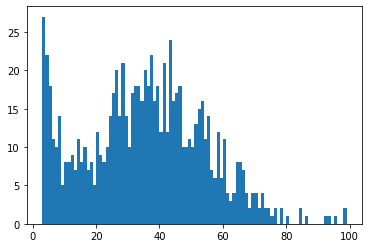

In [224]:
plt.hist(data_pickle_loaded[refined_data.columns[19430]],bins=[i for i in range(3,100)])

In [390]:
[ 8836,  4338, 15471, 20774,  9641,  4341,  2249,  8990, 28780,
       16836, 20202, 29612, 19430, 11299, 22813, 35864, 15027, 18822,
       17088, 11735]

'ENSG00000273842'

(array([161., 111., 108.,  96.,  76.,  65.,  56.,  38.,  42.,  35.,  34.,
         28.,  24.,  11.,  19.,  12.,  14.,  10.,  12.,  10.,  13.,  17.,
          9.,   8.,  15.,   5.,   5.,   8.,  10.,   8.,   4.,   9.,   6.,
          5.,   2.,   2.,   7.,   2.,   4.,   7.,   5.,   1.,   5.,   5.,
          3.,   3.,   4.,   5.,   1.,   6.,   4.,   2.,   3.,   1.,   3.,
          4.,   1.,   4.,   4.,   6.,   1.,   2.,   8.,   4.,   5.,   3.,
          8.,   1.,   2.,   8.,   7.,   2.,   4.,   6.,   5.,   1.,   4.,
          4.,   5.,   2.,   1.,   1.,   2.,   4.,   3.,   4.,   7.,   2.,
          4.,   6.,   4.,   6.,   3.,   6.,   6.,   3.,   5.,   4.,   6.,
          5.,   7.,   2.,   4.,   4.,   3.,   1.,   8.,   5.,  11.,   8.,
          8.,   5.,   9.,   4.,   8.,   7.,   3.,   7.,   8.,   9.,   6.,
          7.,   4.,   5.,   7.,   5.,   6.,   5.,   9.,   3.,  10.,   4.,
          5.,   4.,   6.,   4.,   7.,   3.,   4.,   5.,   6.,   4.,   3.,
          1.,   5.,   8.,   9.,   5., 

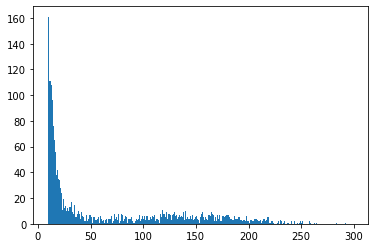

In [21]:
plt.hist(data_pickle_loaded[refined_data.columns[8836]],bins=[i for i in range(10,300)])

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  2.,  3.,  3.,  0.,  3.,  3.,  2.,  2.,  0.,
         3.,  6.,  3.,  4.,  8.,  5., 10.,  9., 11., 11.,  9., 11., 13.,
        16., 13., 14., 16., 12., 15., 11., 17., 28., 20., 17., 14., 26.,
        16., 19., 17., 25., 25., 28., 24., 22., 30., 32., 36., 22., 28.,
        39., 32., 34., 42., 49., 57., 42., 58., 39., 36., 40., 46., 46.,
        56., 51., 50., 50., 48., 50., 57., 60., 67., 61., 60., 55., 68.,
        59., 67., 58., 66., 56., 53., 64., 68., 76., 70., 77., 75., 74.,
        66., 80., 72., 68., 82., 66., 62., 76., 68., 71., 61., 78., 74.,
        79., 78., 78., 73., 66., 62., 66., 78., 68., 71., 56., 81., 69.,
        72., 74., 61., 77., 53., 74., 64., 66., 72., 71., 83., 74., 67.,
        49., 71., 67., 62., 62., 57., 62., 59., 43., 65., 53., 54., 57.,
        66., 68., 63., 47., 57., 53., 56., 54., 47., 42., 50., 58., 42.,
        47., 46., 55., 38., 43., 40., 48., 50., 45.

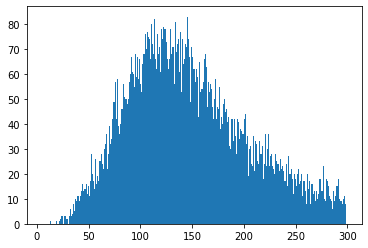

In [229]:
plt.hist(data_pickle_loaded['ENSG00000198242'],bins=[i for i in range(5,300)])

(array([113., 167., 277., 412., 575., 712., 778., 763., 741., 787., 667.,
        628., 555., 517., 404., 390., 316., 278., 228., 193., 144., 142.,
        128., 109.,  90.,  83.,  87.,  50.,  46.,  46.,  39.,  40.,  18.,
         29.,  28.,  34.,  22.,  16.,  10.,  20.,  20.,  13.,  15.,  14.,
         10.,   9.,  10.,   8.,   7.,   4.,   8.,   5.,   5.,   6.,   1.,
          5.,   5.,   2.,   3.,   5.,   8.,   5.,   1.,   2.,   2.,   3.,
          2.,   5.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   1.,   0.,
          0.,   1.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          1.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

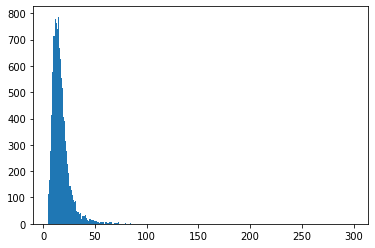

In [230]:
plt.hist(data_pickle_loaded['ENSG00000105063'],bins=[i for i in range(5,300)])

(array([1.0637e+04, 3.2400e+02, 7.4000e+01, 2.3000e+01, 1.5000e+01,
        8.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 9 artists>)

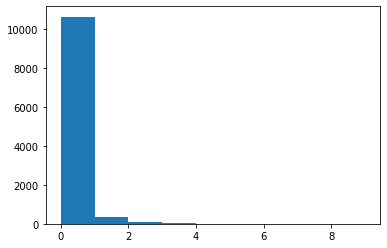

In [210]:
plt.hist(data_pickle_loaded[refined_data.columns[0]],bins=[i for i in range(0,10)])

In [444]:
use_temp=[]
for i in Y_data:
    if i[0]==1:
        use_temp.append(i)

In [446]:
use_temp[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
import os
import numpy as np
import random

import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [30]:
best_gene_names=refined_data.columns[best_gene_index]

In [31]:
best_gene_names

Index(['ENSG00000146083', 'ENSG00000172137', 'ENSG00000182141',
       'ENSG00000070087', 'ENSG00000269148', 'ENSG00000064601',
       'ENSG00000070081', 'ENSG00000161558', 'ENSG00000196167',
       'ENSG00000254131',
       ...
       'ENSG00000279412', 'ENSG00000257053', 'ENSG00000092377',
       'ENSG00000133313', 'ENSG00000173930', 'ENSG00000107863',
       'ENSG00000221760', 'ENSG00000213782', 'ENSG00000186115',
       'ENSG00000105063'],
      dtype='object', length=8000)

In [139]:
best_data

,ENSG00000146083,ENSG00000172137,ENSG00000182141,ENSG00000070087,ENSG00000269148,ENSG00000064601,ENSG00000070081,ENSG00000161558,ENSG00000196167,ENSG00000254131,...,ENSG00000279412,ENSG00000257053,ENSG00000092377,ENSG00000133313,ENSG00000173930,ENSG00000107863,ENSG00000221760,ENSG00000213782,ENSG00000186115,ENSG00000105063
0,8.167628,112.774793,1.490149,12.999738,0.053406,157.439241,12.633001,1.311929,0.009344,0.000000,...,0.014050,0.000000,0.000000,9.649517,0.015299,2.458333,0.000000,0.145722,0.025972,13.710199
1,19.671295,22.504410,1.665859,12.926674,0.187528,129.573341,9.293904,3.208211,0.328114,0.000000,...,0.074004,0.000000,0.000000,4.345716,0.013430,8.567126,0.000000,0.380208,0.000000,34.873762
2,8.209208,31.110055,1.179062,42.343241,0.000000,92.576598,7.795570,4.420860,0.020276,0.000000,...,0.060976,0.000000,0.000000,5.326556,0.006639,3.100859,0.000000,0.288096,0.000000,23.869834
3,7.549678,2.748724,0.992018,12.148178,0.239606,102.122145,12.207803,2.437771,0.203628,0.000000,...,0.072042,0.000000,0.000000,7.211023,0.000000,4.052661,0.000000,0.352835,0.183109,14.761982
4,27.000628,17.682334,0.995801,8.306368,0.043794,333.823433,14.084730,6.201786,1.124492,0.000000,...,0.046087,0.000000,0.000000,5.927603,0.015682,13.724765,0.000000,0.222396,0.005324,18.394012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,8.741210,0.017878,0.930713,32.158911,0.079702,61.269552,5.297217,2.525538,0.135968,0.036246,...,0.020969,0.456695,0.000000,14.679653,0.000000,2.013183,0.135921,0.232576,0.000000,16.723962
11090,5.623583,0.014011,0.404410,8.892079,0.124922,66.976378,1.891307,3.255712,0.185789,0.000000,...,0.041082,0.000000,0.000000,13.299514,0.000000,1.141407,0.000000,0.089949,0.000000,20.268288
11091,10.336545,0.033160,0.546943,12.148016,0.098555,38.904764,1.307946,2.792313,0.023710,0.044819,...,0.051857,0.000000,0.078205,21.521713,0.010587,2.144273,0.000000,0.212890,0.000000,14.666270
11092,9.183449,0.000000,0.347170,9.441420,0.055606,56.724206,2.177299,2.295774,0.048647,0.000000,...,0.058517,0.637250,0.017650,26.851470,0.000000,3.934766,0.000000,0.130653,0.000000,19.060373


In [112]:
pop_test=best_data.to_numpy()

In [113]:
pop_test.shape

(11094, 8000)

In [123]:
Y_data

array(['ACC', 'ACC', 'ACC', ..., 'UVM', 'UVM', 'UVM'], dtype=object)

In [39]:
X_data=best_data.to_numpy()

In [40]:
X_data.shape, Y_data.shape

((11094, 8000), (11094,))

In [149]:
cancer_name_list=['BRCA',
 'KICH',
 'THYM',
 'ACC',
 'HNSC',
 'PRAD',
 'LGG',
 'MESO',
 'PAAD',
 'LUSC',
 'READ',
 'SKCM',
 'CHOL',
 'GBM',
 'LUAD',
 'UVM',
 'thca',
 'BLCA',
 'LIHC',
 'LAML',
 'KIRC',
 'UCS',
 'UCEC',
 'DLBC',
 'COAD',
 'STAD',
 'ESCA',
 'PCPG',
 'OV',
 'CESC',
 'SARC',
 'TGCT',
 'KIRP']

In [150]:
cancer_name_list

['BRCA',
 'KICH',
 'THYM',
 'ACC',
 'HNSC',
 'PRAD',
 'LGG',
 'MESO',
 'PAAD',
 'LUSC',
 'READ',
 'SKCM',
 'CHOL',
 'GBM',
 'LUAD',
 'UVM',
 'thca',
 'BLCA',
 'LIHC',
 'LAML',
 'KIRC',
 'UCS',
 'UCEC',
 'DLBC',
 'COAD',
 'STAD',
 'ESCA',
 'PCPG',
 'OV',
 'CESC',
 'SARC',
 'TGCT',
 'KIRP']

Breast Invasive Carcinoma<br/>Kidney Chromophobe<br/>Thymoma<br/>Adrenocortical Carcinoma<br/>Head and Neck Squamous Cell Carcinoma<br/>Prostate Adenocarcinoma<br/>Brain Lower Grade Glioma<br/>Mesothelioma<br/>Pancreatic Adenocarcinoma<br/>Lung Squamous Cell Carcinoma<br/>Rectum Adenocarcinoma<br/>Skin Cutaneous Melanoma<br/>Cholangiocarcinoma<br/>Glioblastoma Multiforme<br/>Lung Adenocarcinoma<br/>Uveal Melanoma<br/>Thyroid Carcinoma<br/>Bladder Urothelial Carcinoma<br/>Liver Hepatocellular Carcinoma<br/>Acute Myeloid Leukemia<br/>Kidney Renal Clear Cell Carcinoma<br/>Uterine Carcinosarcoma<br/>Uterine Corpus Endometrial Carcinoma<br/>Lymphoid Neoplasm Diffuse Large B-cell Lymphoma<br/>Colon Adenocarcinoma<br/>Stomach Adenocarcinoma<br/>Esophageal Carcinoma<br/>Pheochromocytoma and Paraganglioma<br/>Ovarian Serous Cystadenocarcinoma<br/>Cervical Squamous Cell Carcinoma and Endocervical Adenocarcinoma<br/>Sarcoma<br/>Testicular Germ Cell Tumors<br/>Kidney Renal Papillary Cell Carcinoma

In [50]:
X_data.shape, Y_data.shape

((11094, 8000), (11094,))

In [44]:
X_data_reshaped = np.reshape(X_data, (-1, 8000, 1))

In [45]:
X_data_reshaped.shape

(11094, 8000, 1)

In [131]:
from sklearn.model_selection import train_test_split

X_by_cancer=[[] for _ in range(33)]

for i in range(len(X_data)):
    u=list(Y_data[i])
    cancer_num=u.index(1)
    X_by_cancer[cancer_num].append(X_data[i])

ValueError: 1 is not in list

In [ ]:
for i in range(33):
    X_by_cancer[i]=np.array(X_by_cancer[i])
    X_by_cancer[i]=X_by_cancer[i].astype(np.float32)

In [ ]:
X_by_cancer=np.array(X_by_cancer)

In [ ]:
X_by_cancer[0].shape

In [ ]:


for i in range(33):
    
    X_train_sub, X_valid_sub, Y_train_sub, Y_valid_sub 
    = train_test_split(X_by_cancer[i], np.array([i for _ in range(len(X_by_cancer[i]))]), test_size=0.1, random_state=2)
    
    X_train_sub, X_test_sub, Y_train_sub, Y_test_sub = train_test_split(X_train_sub, Y_train_sub, test_size=1/9, random_state=2)
    
    X_train=np.append(X_train,X_train_sub)
    X_valid=np.append(X_valid,X_valid_sub)
    X_test=np.append(X_test,X_test_sub)

    Y_train=np.append(Y_train,Y_train_sub)
    Y_valid=np.append(Y_valid,Y_valid_sub)
    Y_test=np.append(Y_test,Y_test_sub)

In [ ]:
Y_train.shape, Y_valid.shape, Y_test.shape

In [ ]:
X_train=X_train.reshape(Y_train.shape[0],8000,1)
X_valid=X_valid.reshape(Y_valid.shape[0],8000,1)
X_test=X_test.reshape(Y_test.shape[0],8000,1)

In [ ]:
X_train.shape, X_valid.shape, X_test.shape

In [ ]:
for i in range(33):
    temp=list(Y_train)
    print(i,temp.count(i))

In [ ]:
for i in range(33):
    temp=list(Y_valid)
    print(i,temp.count(i))

In [ ]:
for i in range(33):
    temp=list(Y_test)
    print(i,temp.count(i))

In [ ]:
zip_train = [[x,y] for x, y in zip(X_train, Y_train)]
zip_valid = [[x,y] for x, y in zip(X_valid, Y_valid)]
zip_test = [[x,y] for x, y in zip(X_test, Y_test)]

In [ ]:
import random
random.shuffle(zip_train)
random.shuffle(zip_valid)
random.shuffle(zip_test)

X_train = [n[0] for n in zip_train]
Y_train = [n[1] for n in zip_train]
X_valid = [n[0] for n in zip_valid]
Y_valid = [n[1] for n in zip_valid]
X_test = [n[0] for n in zip_test]
Y_test = [n[1] for n in zip_test]

In [ ]:
X_train=np.array(X_train)
X_valid=np.array(X_valid)
X_test=np.array(X_test)

In [ ]:
X_train.shape,X_valid.shape,X_test.shape

In [ ]:
Y_train[:30]

In [ ]:
Y_one_hot_train=[]
for i in range(len(Y_train)):
    encoded=[0 for _ in range(33)]
    encoded[Y_train[i]]=1
    Y_one_hot_train.append(encoded)
    
Y_one_hot_train=np.array(Y_one_hot_train)
Y_train=Y_one_hot_train

In [ ]:
Y_one_hot_valid=[]
for i in range(len(Y_valid)):
    encoded=[0 for _ in range(33)]
    encoded[Y_valid[i]]=1
    Y_one_hot_valid.append(encoded)
    
Y_one_hot_valid=np.array(Y_one_hot_valid)
Y_valid=Y_one_hot_valid

In [ ]:
Y_one_hot_test=[]
for i in range(len(Y_test)):
    encoded=[0 for _ in range(33)]
    encoded[Y_test[i]]=1
    Y_one_hot_test.append(encoded)
    
Y_one_hot_test=np.array(Y_one_hot_test)
Y_test=Y_one_hot_test

In [281]:
# model building
# import
import os
import numpy as np
import random

import keras
import tensorflow as tf
import matplotlib.pyplot as plt

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3,activation='relu', padding='same', input_shape=(8000,1)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3,activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(33))
model.add(tf.keras.layers.Softmax())

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 8000, 64)          256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4000, 64)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4000, 64)          12352     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2000, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16384128  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [282]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [283]:
# model training
# using training and validation set
epochs = 50

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model_EL.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

hist = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=epochs, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.65986, saving model to best_model_EL.h5

Epoch 00002: val_accuracy improved from 0.65986 to 0.86057, saving model to best_model_EL.h5

Epoch 00003: val_accuracy improved from 0.86057 to 0.88277, saving model to best_model_EL.h5

Epoch 00004: val_accuracy improved from 0.88277 to 0.89343, saving model to best_model_EL.h5

Epoch 00005: val_accuracy improved from 0.89343 to 0.90497, saving model to best_model_EL.h5

Epoch 00006: val_accuracy improved from 0.90497 to 0.92274, saving model to best_model_EL.h5

Epoch 00007: val_accuracy did not improve from 0.92274

Epoch 00008: val_accuracy did not improve from 0.92274

Epoch 00009: val_accuracy improved from 0.92274 to 0.92362, saving model to best_model_EL.h5

Epoch 00010: val_accuracy improved from 0.92362 to 0.92629, saving model to best_model_EL.h5

Epoch 00011: val_accuracy did not improve from 0.92629

Epoch 00012: val_accuracy did not improve from 0.92629

Epoch 00013: val_accuracy 

In [284]:
model.evaluate(X_test, Y_test, verbose=2)

35/35 - 1s - loss: 0.2478 - accuracy: 0.9303


[0.24777066707611084, 0.930294930934906]

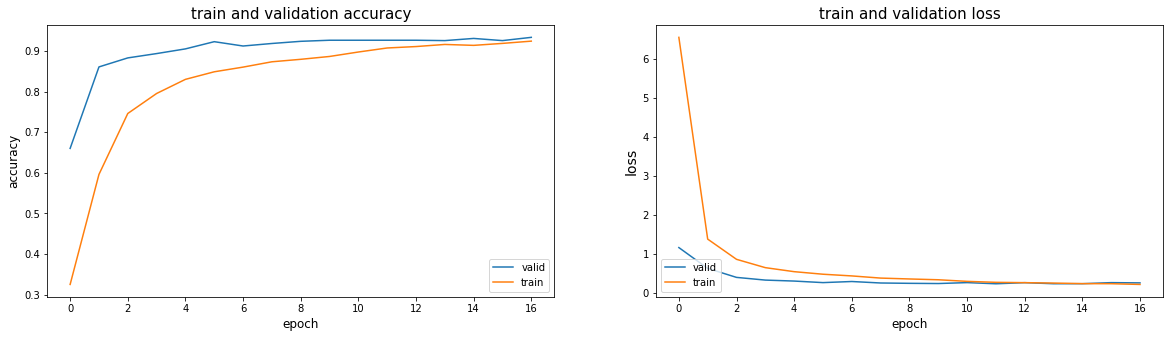

In [372]:
# plot the accuracy and loss value of each model.

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['accuracy'])
plt.title('train and validation accuracy',fontsize=15)
plt.ylabel('accuracy',fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.legend(['valid', 'train'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('train and validation loss',fontsize=15)
plt.ylabel('loss',fontsize=14)
plt.xlabel('epoch',fontsize=12)
plt.legend(['valid', 'train'], loc='lower left')
plt.show()

In [81]:
X_data_reshaped[0]

array([[8.16762834e+00],
       [1.12774793e+02],
       [1.49014924e+00],
       ...,
       [1.45721777e-01],
       [2.59720544e-02],
       [1.37101989e+01]])

In [26]:
from keras.models import load_model
saved_model = load_model('best_model.h5')
saved_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [138]:
X_data_reshaped[-1]

array([[14.9453761 ],
       [ 0.96964925],
       [ 0.19488744],
       ...,
       [ 0.11745635],
       [ 0.        ],
       [19.62270561]])

In [161]:
for i in range(len(X_data)):
    inn=X_data[i].reshape(1,8000,1)
    y_pred.append(int(saved_model.predict_classes(inn)))
    if i%1000==0:
        print("did "+str(i))

did 0
did 1000
did 2000
did 3000
did 4000
did 5000
did 6000
did 7000
did 8000
did 9000
did 10000
did 11000


In [173]:
print(metrics.confusion_matrix(y_true_one_hot, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true_one_hot, y_pred, digits=3))

[[1217    0    0 ...    1    0    0]
 [   0   70    0 ...    1    0    3]
 [   0    0  121 ...    0    0    0]
 ...
 [   0    0    0 ...  262    0    0]
 [   0    0    0 ...    0  155    0]
 [   0    2    0 ...    0    0  308]]
              precision    recall  f1-score   support

           0      0.999     0.996     0.998      1222
           1      0.933     0.787     0.854        89
           2      1.000     1.000     1.000       121
           3      1.000     0.987     0.994        79
           4      0.971     0.971     0.971       546
           5      1.000     1.000     1.000       551
           6      0.985     1.000     0.992       529
           7      1.000     0.977     0.988        86
           8      0.973     0.989     0.981       182
           9      0.982     0.897     0.937       551
          10      0.727     0.226     0.345       177
          11      0.998     0.989     0.994       472
          12      0.939     0.689     0.795        45
          13   

In [174]:
from sklearn.metrics import plot_confusion_matrix

<AxesSubplot:>

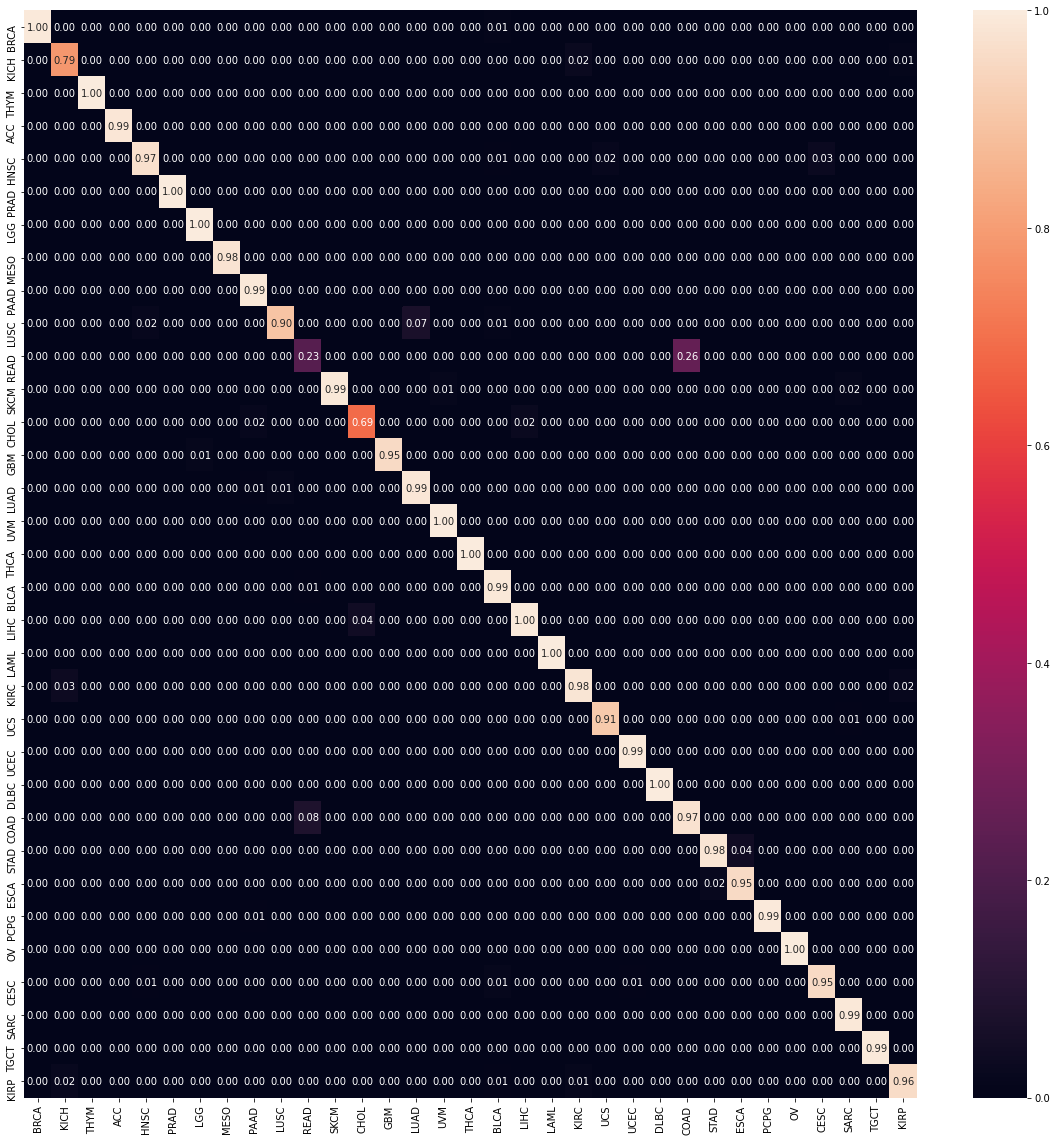

In [192]:
C=metrics.confusion_matrix(y_true_one_hot, y_pred)
C = C/ C.astype(np.float).sum(axis=1)


df_cm = pd.DataFrame(C, index = [i for i in cancer_name_list_for_draw],
                  columns = [i for i in cancer_name_list_for_draw])
plt.figure(figsize = (20,20))
plt.ylabel('Actual')
plt.xlabel('Predicted')
sn.heatmap(df_cm, annot=True,fmt='.2f',)

In [177]:
cancer_name_list_for_draw=cancer_name_list.copy()
cancer_name_list_for_draw[16]='THCA'

In [209]:
cancer_name_list_for_draw

['BRCA',
 'KICH',
 'THYM',
 'ACC',
 'HNSC',
 'PRAD',
 'LGG',
 'MESO',
 'PAAD',
 'LUSC',
 'READ',
 'SKCM',
 'CHOL',
 'GBM',
 'LUAD',
 'UVM',
 'THCA',
 'BLCA',
 'LIHC',
 'LAML',
 'KIRC',
 'UCS',
 'UCEC',
 'DLBC',
 'COAD',
 'STAD',
 'ESCA',
 'PCPG',
 'OV',
 'CESC',
 'SARC',
 'TGCT',
 'KIRP']

In [200]:
ll=np.array([[0,0.999,0.996,0.998,1222],
[1,0.933,0.787,0.854,89],
[2,1.000,1.000,1.000,121],
[3,1.000,0.987,0.994,79],
[4,0.971,0.971,0.971,546],
[5,1.000,1.000,1.000,551],
[6,0.985,1.000,0.992,529],
[7,1.000,0.977,0.988,86],
[8,0.973,0.989,0.981,182],
[9,0.982,0.897,0.937,551],
[10,0.727,0.226,0.345,177],
[11,0.998,0.989,0.994,472],
[12,0.939,0.689,0.795,45],
[13,1.000,0.954,0.977,175],
[14,0.933,0.987,0.959,594],
[15,0.988,1.000,0.994,80],
[16,1.000,1.000,1.000,568],
[17,0.949,0.991,0.969,433],
[18,0.972,0.995,0.984,424],
[19,1.000,1.000,1.000,151],
[20,0.960,0.984,0.972,611],
[21,0.981,0.911,0.944,56],
[22,0.992,0.995,0.993,587],
[23,1.000,1.000,1.000,48],
[24,0.785,0.973,0.869,521],
[25,0.980,0.983,0.982,407],
[26,0.959,0.954,0.957,173],
[27,1.000,0.995,0.997,186],
[28,1.000,1.000,1.000,379],
[29,0.958,0.955,0.956,309],
[30,0.956,0.989,0.972,265],
[31,1.000,0.994,0.997,156],
[32,0.972,0.960,0.966,321]])

In [202]:
precisions=ll[:,1]
recalls=ll[:,2]
f1scores=ll[:,3]

In [206]:
list(precisions)

[0.999,
 0.933,
 1.0,
 1.0,
 0.971,
 1.0,
 0.985,
 1.0,
 0.973,
 0.982,
 0.727,
 0.998,
 0.939,
 1.0,
 0.933,
 0.988,
 1.0,
 0.949,
 0.972,
 1.0,
 0.96,
 0.981,
 0.992,
 1.0,
 0.785,
 0.98,
 0.959,
 1.0,
 1.0,
 0.958,
 0.956,
 1.0,
 0.972]

In [207]:
list(recalls)

[0.996,
 0.787,
 1.0,
 0.987,
 0.971,
 1.0,
 1.0,
 0.977,
 0.989,
 0.897,
 0.226,
 0.989,
 0.689,
 0.954,
 0.987,
 1.0,
 1.0,
 0.991,
 0.995,
 1.0,
 0.984,
 0.911,
 0.995,
 1.0,
 0.973,
 0.983,
 0.954,
 0.995,
 1.0,
 0.955,
 0.989,
 0.994,
 0.96]

In [208]:
list(f1scores)

[0.998,
 0.854,
 1.0,
 0.994,
 0.971,
 1.0,
 0.992,
 0.988,
 0.981,
 0.937,
 0.345,
 0.994,
 0.795,
 0.977,
 0.959,
 0.994,
 1.0,
 0.969,
 0.984,
 1.0,
 0.972,
 0.944,
 0.993,
 1.0,
 0.869,
 0.982,
 0.957,
 0.997,
 1.0,
 0.956,
 0.972,
 0.997,
 0.966]

In [196]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [197]:
f1_score(y_true_one_hot, y_pred, average="macro")

0.9495427797805356

In [199]:
recall_score(y_true_one_hot, y_pred, average="macro")

0.9431493201109353

In [367]:
qweqwe=0
for o in cancer_type_list:
    print(len(o))
    qweqwe+=len(o)

1222
89
121
79
546
551
529
86
182
551
177
472
45
175
594
80
568
433
424
151
611
56
587
48
521
407
173
186
379
309
265
156
321


In [313]:
mean_data_by_cancer=[]
for c in range(33):
    mean_data=np.mean(X_data[cancer_type_list[c]],axis=0)
    mean_data_by_cancer.append(mean_data)

In [314]:
mean_data_by_cancer=np.array(mean_data_by_cancer)

In [315]:
mean_data_by_cancer=mean_data_by_cancer.reshape(33,8000,1)
mean_data_by_cancer.shape

(33, 8000, 1)

In [316]:
model.predict_classes(mean_data_by_cancer)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 24, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [318]:
high_level_mean=np.mean(X_data,axis=0)
high_level_std=np.std(X_data,axis=0)

In [346]:
best_increase=[]

for cancer in range(33):
    mmm=0
    there_gene=0
    for gene in range(8000):
        new_gene=mean_data_by_cancer[cancer].copy()
        new_gene[gene]+=0.8*high_level_std[gene]
        predict_before=model.predict(np.array([mean_data_by_cancer[cancer]]))
        predict_after=model.predict(np.array([new_gene]))
        now_max=(predict_before-predict_after).max()
        
        delta=predict_before-predict_after
        for i in range(len(delta[0])):
            best_increase.append([delta[0][i],cancer,i,gene])
        
        if now_max>mmm:
            mmm=now_max
            there_gene=gene
        if gene%1000==0 and gene>0:
            print("did gene "+str(gene)+" in "+str(cancer))
        
    print(mmm,there_gene)

did gene 1000 in 0
did gene 2000 in 0
did gene 3000 in 0
did gene 4000 in 0
did gene 5000 in 0
did gene 6000 in 0
did gene 7000 in 0
1.7421105e-17 754
did gene 1000 in 1
did gene 2000 in 1
did gene 3000 in 1
did gene 4000 in 1
did gene 5000 in 1
did gene 6000 in 1
did gene 7000 in 1
0.20738912 4559
did gene 1000 in 2
did gene 2000 in 2
did gene 3000 in 2
did gene 4000 in 2
did gene 5000 in 2
did gene 6000 in 2
did gene 7000 in 2
3.3913497e-16 3413
did gene 1000 in 3
did gene 2000 in 3
did gene 3000 in 3
did gene 4000 in 3
did gene 5000 in 3
did gene 6000 in 3
did gene 7000 in 3
1.66893e-06 5628
did gene 1000 in 4
did gene 2000 in 4
did gene 3000 in 4
did gene 4000 in 4
did gene 5000 in 4
did gene 6000 in 4
did gene 7000 in 4
1.4543533e-05 4466
did gene 1000 in 5
did gene 2000 in 5
did gene 3000 in 5
did gene 4000 in 5
did gene 5000 in 5
did gene 6000 in 5
did gene 7000 in 5
6.159392e-18 7073
did gene 1000 in 6
did gene 2000 in 6
did gene 3000 in 6
did gene 4000 in 6
did gene 5000 in 6


In [348]:
best_increase.sort()

In [349]:
best_increase[-30:]

[[0.04044637, 24, 10, 6415],
 [0.041650057, 1, 1, 3066],
 [0.04178661, 12, 18, 7943],
 [0.042351007, 24, 10, 4062],
 [0.042587966, 24, 10, 3684],
 [0.0438025, 24, 24, 7338],
 [0.0444642, 10, 10, 5483],
 [0.044521987, 24, 10, 3943],
 [0.04630947, 24, 24, 6200],
 [0.046376407, 24, 24, 1996],
 [0.048416466, 24, 10, 6150],
 [0.04900779, 24, 10, 5733],
 [0.051511288, 1, 1, 7516],
 [0.05288261, 12, 12, 1724],
 [0.054597333, 24, 10, 5483],
 [0.056228936, 24, 24, 7427],
 [0.057407007, 1, 20, 4466],
 [0.06032467, 24, 24, 5911],
 [0.060889766, 1, 20, 2472],
 [0.0646286, 12, 12, 7072],
 [0.0689677, 12, 12, 3789],
 [0.075452566, 12, 12, 3505],
 [0.07681381, 1, 20, 5628],
 [0.08495414, 12, 12, 1996],
 [0.0873245, 1, 1, 5911],
 [0.10469359, 24, 24, 7179],
 [0.107069254, 12, 12, 4335],
 [0.1163314, 24, 10, 4466],
 [0.14220533, 10, 10, 4466],
 [0.20738912, 1, 1, 4559]]

In [350]:
best_increase2=[]

for cancer in range(33):
    mmm=0
    there_gene=0
    for gene in range(8000):
        new_gene=mean_data_by_cancer[cancer].copy()
        new_gene[gene]+=1.5*high_level_std[gene]
        predict_before=model.predict(np.array([mean_data_by_cancer[cancer]]))
        predict_after=model.predict(np.array([new_gene]))
        now_max=(predict_before-predict_after).max()
        
        delta=predict_before-predict_after
        for i in range(len(delta[0])):
            best_increase2.append([delta[0][i],cancer,i,gene])
        
        if now_max>mmm:
            mmm=now_max
            there_gene=gene
        if gene%1000==0 and gene>0:
            print("did gene "+str(gene)+" in "+str(cancer))
        
    print(mmm,there_gene)

did gene 1000 in 0
did gene 2000 in 0
did gene 3000 in 0
did gene 4000 in 0
did gene 5000 in 0
did gene 6000 in 0
did gene 7000 in 0
1.7587853e-17 754
did gene 1000 in 1
did gene 2000 in 1
did gene 3000 in 1
did gene 4000 in 1
did gene 5000 in 1
did gene 6000 in 1
did gene 7000 in 1
0.17763543 5911
did gene 1000 in 2
did gene 2000 in 2
did gene 3000 in 2
did gene 4000 in 2
did gene 5000 in 2
did gene 6000 in 2
did gene 7000 in 2
4.1117584e-16 1154
did gene 1000 in 3
did gene 2000 in 3
did gene 3000 in 3
did gene 4000 in 3
did gene 5000 in 3
did gene 6000 in 3
did gene 7000 in 3
4.053116e-06 4335
did gene 1000 in 4
did gene 2000 in 4
did gene 3000 in 4
did gene 4000 in 4
did gene 5000 in 4
did gene 6000 in 4
did gene 7000 in 4
1.3709068e-05 4466
did gene 1000 in 5
did gene 2000 in 5
did gene 3000 in 5
did gene 4000 in 5
did gene 5000 in 5
did gene 6000 in 5
did gene 7000 in 5
6.2819347e-18 7099
did gene 1000 in 6
did gene 2000 in 6
did gene 3000 in 6
did gene 4000 in 6
did gene 5000 in 

In [351]:
best_increase2.sort()

In [352]:
best_increase2[:20]

[[-0.2563449, 12, 18, 4335],
 [-0.17723466, 1, 20, 5911],
 [-0.16367352, 10, 24, 4335],
 [-0.16022599, 10, 24, 4466],
 [-0.12728351, 24, 24, 4466],
 [-0.12664892, 1, 20, 2811],
 [-0.120656654, 1, 20, 4559],
 [-0.120251566, 12, 18, 1996],
 [-0.12013729, 24, 10, 1996],
 [-0.116839424, 24, 10, 5911],
 [-0.10709779, 24, 10, 7179],
 [-0.09154153, 24, 24, 3943],
 [-0.091053605, 12, 18, 3505],
 [-0.08313042, 12, 18, 5338],
 [-0.08261523, 12, 18, 3789],
 [-0.07974863, 12, 18, 1724],
 [-0.07902205, 24, 24, 5733],
 [-0.07898635, 10, 24, 3943],
 [-0.077896714, 1, 1, 5628],
 [-0.07779206, 24, 10, 1147]]

In [353]:
best_increase2[-20:]

[[0.07779211, 24, 24, 1147],
 [0.07852322, 12, 12, 5338],
 [0.07884604, 1, 1, 4391],
 [0.07898858, 10, 10, 3943],
 [0.07902205, 24, 10, 5733],
 [0.081127346, 12, 12, 1724],
 [0.08720809, 12, 12, 3505],
 [0.09154174, 24, 10, 3943],
 [0.09889954, 12, 12, 3789],
 [0.10709798, 24, 24, 7179],
 [0.11683959, 24, 24, 5911],
 [0.11708516, 1, 1, 4559],
 [0.12013751, 24, 24, 1996],
 [0.121540904, 12, 12, 1996],
 [0.124462426, 1, 1, 2811],
 [0.12728384, 24, 10, 4466],
 [0.16023463, 10, 10, 4466],
 [0.16367525, 10, 10, 4335],
 [0.17763543, 1, 1, 5911],
 [0.23894918, 12, 12, 4335]]

In [ ]:
best_decrease=[]

for cancer in range(33):
    mmm=0
    there_gene=0
    for gene in range(8000):
        new_gene=mean_data_by_cancer[cancer].copy()
        new_gene[gene]-=0.8*high_level_std[gene]
        if new_gene[gene]<0:
            new_gene[gene]=0
        predict_before=model.predict(np.array([mean_data_by_cancer[cancer]]))
        predict_after=model.predict(np.array([new_gene]))
        now_max=(predict_before-predict_after).max()
        
        delta=predict_before-predict_after
        for i in range(len(delta[0])):
            best_decrease.append([delta[0][i],cancer,i,gene])
        
        if now_max>mmm:
            mmm=now_max
            there_gene=gene
        if gene%1000==0 and gene>0:
            print("did gene "+str(gene)+" in "+str(cancer))
        
    print(mmm,there_gene)

In [ ]:
best_decrease=[]

for cancer in range(33):
    mmm=0
    there_gene=0
    for gene in range(8000):
        new_gene=mean_data_by_cancer[cancer].copy()
        new_gene[gene]-=0.8*high_level_std[gene]
        if new_gene[gene]<0:
            new_gene[gene]=0
        predict_before=model.predict(np.array([mean_data_by_cancer[cancer]]))
        predict_after=model.predict(np.array([new_gene]))
        now_max=(predict_before-predict_after).max()
        
        delta=predict_before-predict_after
        for i in range(len(delta[0])):
            best_decrease.append([delta[0][i],cancer,i,gene])
        
        if now_max>mmm:
            mmm=now_max
            there_gene=gene
        if gene%1000==0 and gene>0:
            print("did gene "+str(gene)+" in "+str(cancer))
        
    print(mmm,there_gene)

In [ ]:
best_decrease2=[]

for cancer in range(33):
    mmm=0
    there_gene=0
    for gene in range(8000):
        new_gene=mean_data_by_cancer[cancer].copy()
        new_gene[gene]-=1.6*high_level_std[gene]
        if new_gene[gene]<0:
            new_gene[gene]=0
        predict_before=model.predict(np.array([mean_data_by_cancer[cancer]]))
        predict_after=model.predict(np.array([new_gene]))
        now_max=(predict_before-predict_after).max()
        
        delta=predict_before-predict_after
        for i in range(len(delta[0])):
            best_decrease2.append([delta[0][i],cancer,i,gene])
        
        if now_max>mmm:
            mmm=now_max
            there_gene=gene
        if gene%1000==0 and gene>0:
            print("did gene "+str(gene)+" in "+str(cancer))
        
    print(mmm,there_gene)

In [359]:
best_decrease.sort()
best_decrease2.sort()

In [360]:
best_decrease2[:30]

[[-0.13615187, 1, 20, 686],
 [-0.123247206, 12, 18, 5628],
 [-0.08242589, 10, 24, 4138],
 [-0.07745598, 24, 10, 4132],
 [-0.07133919, 24, 24, 4138],
 [-0.068957314, 1, 20, 3062],
 [-0.060336962, 1, 20, 3986],
 [-0.05705005, 1, 20, 3063],
 [-0.05186218, 12, 18, 3667],
 [-0.051122785, 12, 12, 3945],
 [-0.050005734, 12, 12, 1446],
 [-0.04805267, 24, 24, 3121],
 [-0.047832146, 24, 10, 3627],
 [-0.04632151, 24, 24, 6412],
 [-0.045927748, 1, 20, 687],
 [-0.04574555, 10, 24, 3121],
 [-0.045019284, 12, 18, 4466],
 [-0.045019284, 12, 18, 4467],
 [-0.043952182, 24, 10, 3118],
 [-0.041638553, 12, 12, 7072],
 [-0.04071863, 24, 10, 7178],
 [-0.039991856, 12, 12, 7073],
 [-0.03949587, 24, 10, 4131],
 [-0.03778474, 24, 10, 1391],
 [-0.037209436, 12, 18, 602],
 [-0.037185118, 24, 10, 66],
 [-0.036427587, 12, 18, 4391],
 [-0.036407948, 12, 18, 6235],
 [-0.03640288, 1, 1, 7073],
 [-0.036189094, 24, 10, 3437]]

In [361]:
best_decrease2[-30:]

[[0.03844893, 12, 18, 5629],
 [0.039495945, 24, 24, 4131],
 [0.039629936, 12, 12, 4466],
 [0.039629936, 12, 12, 4467],
 [0.040718615, 24, 24, 7178],
 [0.041843697, 12, 18, 7073],
 [0.04331185, 12, 18, 7072],
 [0.04345852, 12, 12, 602],
 [0.043952167, 24, 24, 3118],
 [0.044067696, 1, 20, 7072],
 [0.044965446, 1, 1, 687],
 [0.045366332, 12, 18, 3945],
 [0.045745343, 10, 10, 3121],
 [0.04602617, 12, 12, 7077],
 [0.04631406, 12, 12, 7076],
 [0.046321467, 24, 10, 6412],
 [0.047450364, 12, 18, 1446],
 [0.04750359, 1, 20, 7073],
 [0.04783219, 24, 24, 3627],
 [0.048052654, 24, 10, 3121],
 [0.050967336, 12, 12, 3667],
 [0.057354823, 12, 18, 4335],
 [0.05998665, 1, 1, 3063],
 [0.06474513, 1, 1, 3986],
 [0.071339175, 24, 10, 4138],
 [0.072467566, 1, 1, 3062],
 [0.07745606, 24, 24, 4132],
 [0.08242583, 10, 10, 4138],
 [0.115680456, 12, 12, 5628],
 [0.134013, 1, 1, 686]]